# 分析内容
- [-]看NN和HH中N和H的差别
- [-]看LR之间的区别, 在NN和HH里
- [-]看NN和NH中的N的差别
- [-]看HH和NH中H的差别
- [-]看笼2和笼3之间的HH的差别
    - 评估不同限食组间的差别
- [-]在NN和HH中, 看前2h和后2h之间的差异
- [-]分别在前2h和后2h分析NN&NH(N)和HH&NH(H)
- [-]看食物的大小会不会对小鼠的进食行为产生影响, 在NN和HH中
- [-]看两天不同的NH中, N内是否有差异, H内是否有差异
- [-]数据中导入限食组的体重和与控制组的体重百分比
    - 既然有food结果, food可以代表其饥饿水平
    - 还是需要证据证明其饥饿水平和体重百分比存在关联
- [0]写代码整理每5分钟进食时间的数据
    - 次数无法在5分钟内得到合理的展示
- [-]**写代码整理每10分钟进食时间的数据**
    - [-]批量改我的csv所有的label
    - [ ]把这些数据画一下
- [-]处理新的HH和NH数据,看H的变化
- [-]处理新的NH数据,看和旧的NH中N的变化

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import scipy.stats as stats

In [109]:
def PTTest(SampleA,SampleB):
    #paired ttest
    SA=np.array(SampleA)
    SB=np.array(SampleB)
    S0=np.zeros(len(SA))
    SR=SA-SB
    print(' Two Sample TTest: ',stats.ttest_ind(SampleA,SampleB)[1])
    print(' Paired TTest: ',stats.ttest_ind(SR,S0)[1])
def Splt(xVal,pltTitle,pltScale=3):
    sns.set(font_scale=pltScale)
    sns.set_style('white') 
    for yVal in ['ChewCount','ChewTime','ClimbCount','ClimbTime','food']:
        sns.stripplot(data=a,y=yVal,x=xVal,jitter=True,color='.5')
        sns.barplot(data=a,y=yVal,x=xVal,color='.8')
        plt.title(pltTitle)
        plt.show()
        plt.close('all')

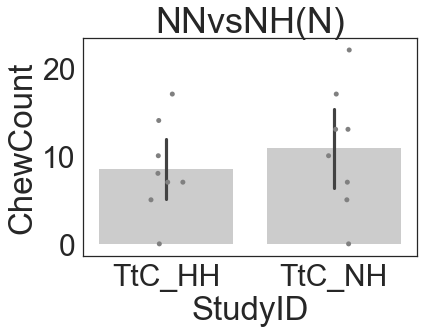

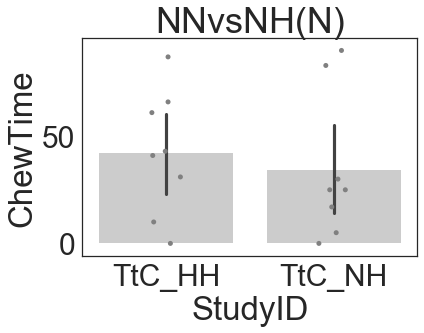

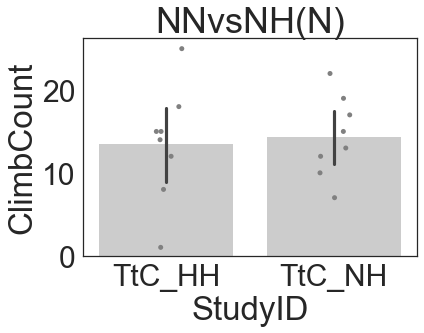

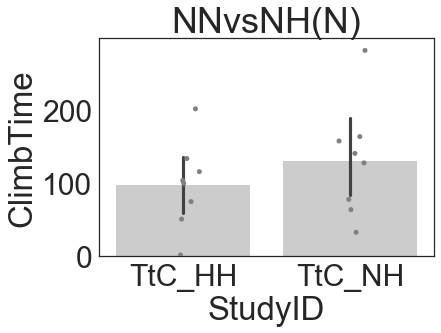

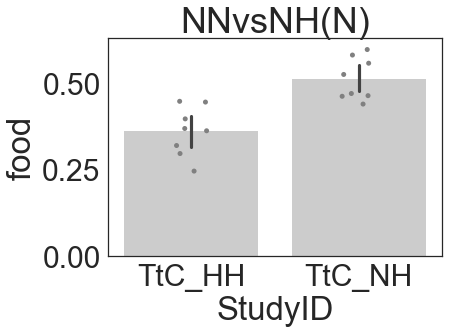

 Two Sample TTest:  0.454143946458
 Paired TTest:  0.356805734019
 Two Sample TTest:  0.619159162313
 Paired TTest:  0.598757876251
 Two Sample TTest:  0.776928597974
 Paired TTest:  0.713274050633
 Two Sample TTest:  0.352948048716
 Paired TTest:  0.353836040283
 Two Sample TTest:  0.000420887111176
 Paired TTest:  1.87541325279e-05


In [112]:
data = pd.read_csv('/Volumes/HaoZHard2/result/data/test_list_20171226.csv')
# ana
a = data[(data.Date>=20171215)&(data.Date<=20171218)&(data.Date!=20171216)&(data.Cage==2)&(data.Duration_part==1)]
Splt(xVal='StudyID',pltTitle='NNvsNH(N)',pltScale=3)

for i in ['ChewCount','ChewTime','ClimbCount','ClimbTime','food']:
    PTTest(SampleA=a[a.StudyID=='TtC_HH'][i],SampleB=a[a.StudyID=='TtC_NH'][i])



In [84]:
data = pd.read_csv('/Volumes/HaoZHard2/result/data/原始数据-表格 1.csv')

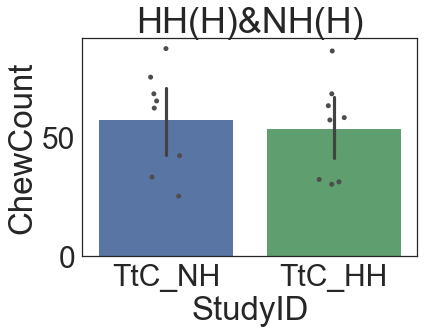

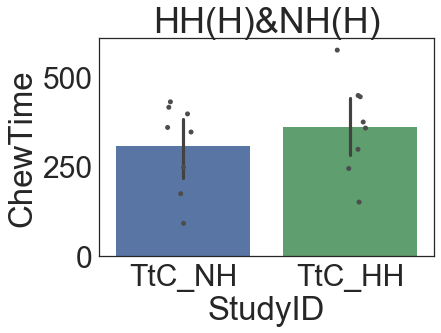

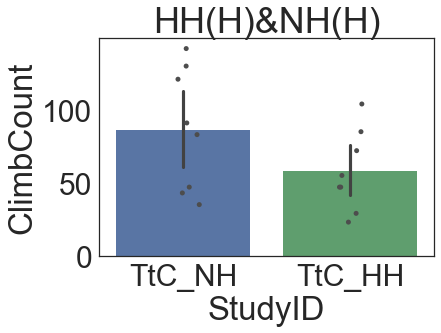

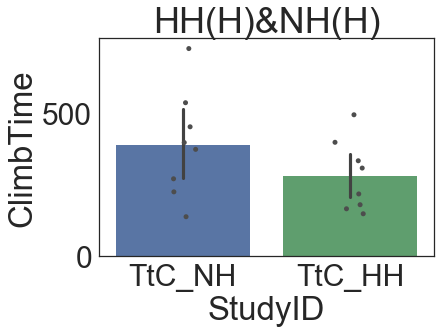

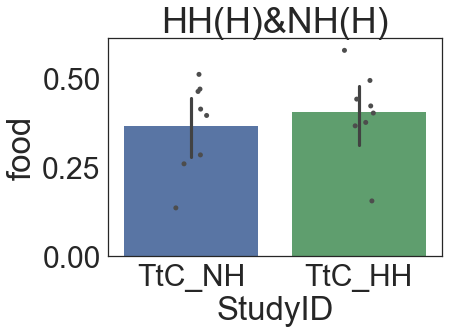

In [51]:
a = data[(data.Date>=20171223)&(data.Cage==2)]
Splt(xVal='StudyID',pltTitle='HH(H)&NH(H)')

   StudyID  Cage  Mice  oppositeCage  oppositeMice BehaviorCagePosition  \
9   TtC_NH     2     1             1             1                    R   
11  TtC_NH     2     2             1             2                    R   
13  TtC_NH     2     3             1             3                    R   
15  TtC_NH     2     4             1             4                    R   
17  TtC_NH     2     5             1             5                    R   
19  TtC_NH     2     6             1             6                    R   
21  TtC_NH     2     7             1             7                    R   
23  TtC_NH     2     8             1             8                    R   
71  TtC_NH     2     1             1             1                    R   
73  TtC_NH     2     2             1             2                    R   
75  TtC_NH     2     3             1             3                    R   
77  TtC_NH     2     4             1             4                    R   
79  TtC_NH     2     5   

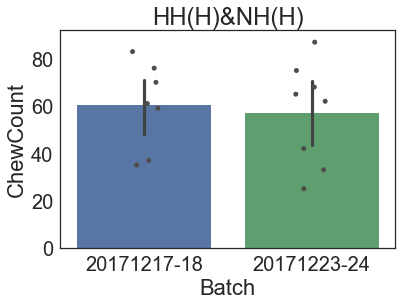

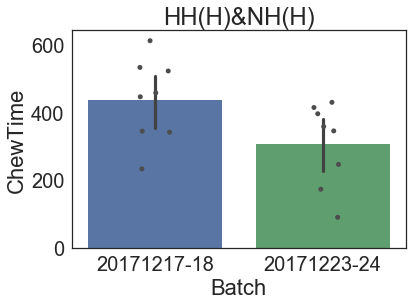

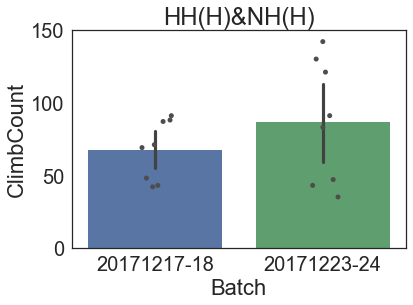

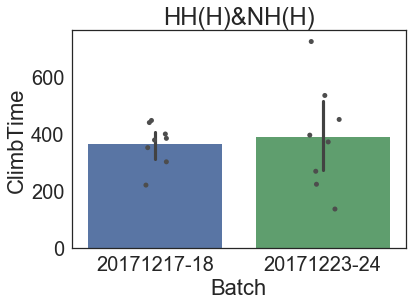

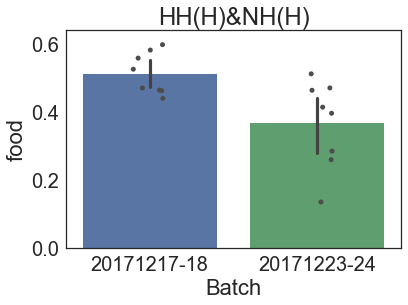

 Two Sample TTest:  0.752795426692
 Paired TTest:  0.669915305909
 Two Sample TTest:  0.0546635696289
 Paired TTest:  0.03279373024
 Two Sample TTest:  0.266583922989
 Paired TTest:  0.168982837722
 Two Sample TTest:  0.753443230824
 Paired TTest:  0.729761027738
 Two Sample TTest:  0.0119816118565
 Paired TTest:  0.00146233364802


In [55]:
# - [ ]处理新的NH数据,看和旧的NH中N的变化
a = data[(data.StudyID=='TtC_NH')&(data.Cage==2)]
print(a)
Splt('Batch','17_NH vs 23_NH(N)',pltScale=2)
PTTest(SampleA=a[a.Batch=='20171217-18']['ChewCount'],SampleB=a[a.Batch=='20171223-24']['ChewCount'])
PTTest(SampleA=a[a.Batch=='20171217-18']['ChewTime'],SampleB=a[a.Batch=='20171223-24']['ChewTime'])
PTTest(SampleA=a[a.Batch=='20171217-18']['ClimbCount'],SampleB=a[a.Batch=='20171223-24']['ClimbCount'])
PTTest(SampleA=a[a.Batch=='20171217-18']['ClimbTime'],SampleB=a[a.Batch=='20171223-24']['ClimbTime'])
PTTest(SampleA=a[a.Batch=='20171217-18']['food'],SampleB=a[a.Batch=='20171223-24']['food'])




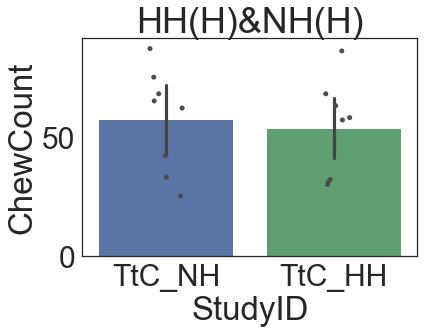

 Two Sample TTest:  0.708817024012
 Paired TTest:  0.654375651315


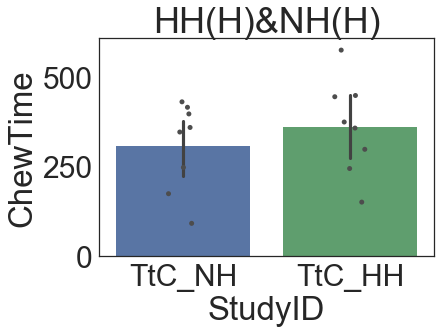

 Two Sample TTest:  0.413345712585
 Paired TTest:  0.0571667434476


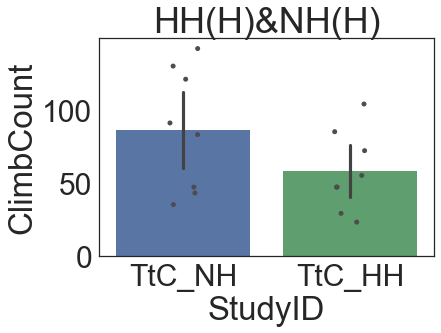

 Two Sample TTest:  0.127730825223
 Paired TTest:  0.000498907651496


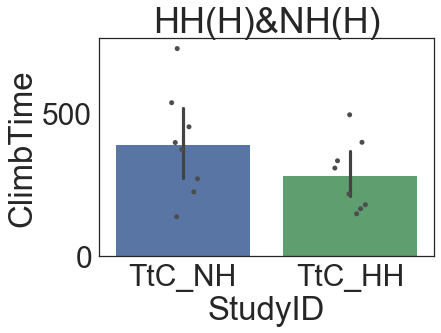

 Two Sample TTest:  0.189835534169
 Paired TTest:  0.00509784026325


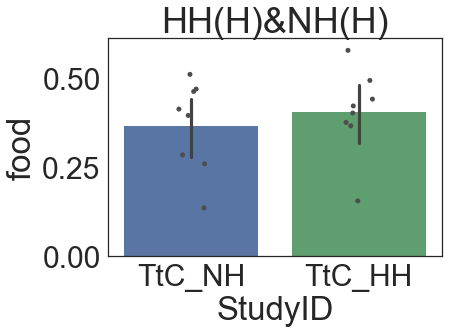

 Two Sample TTest:  0.554264389372
 Paired TTest:  0.131395957759


In [40]:
# - [ ]处理新的HH和NH数据,看H的变化
a = data[(data.Date>=20171223)&(data.Cage==2)]
# print(a)
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="StudyID")
plt.title('HH(H)&NH(H)')
plt.show()
plt.close('all')
# ttest
PTTest(SampleA=a[a.StudyID=='TtC_HH']['ChewCount'],SampleB=a[a.StudyID=='TtC_NH']['ChewCount'])

sns.stripplot(data=a,y='ChewTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="StudyID")
plt.title('HH(H)&NH(H)')
plt.show()
plt.close('all')
# ttest
PTTest(SampleA=a[a.StudyID=='TtC_HH']['ChewTime'],SampleB=a[a.StudyID=='TtC_NH']['ChewTime'])



sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="StudyID")
plt.title('HH(H)&NH(H)')
plt.show()
plt.close('all')
# ttest
PTTest(SampleA=a[a.StudyID=='TtC_HH']['ClimbCount'],SampleB=a[a.StudyID=='TtC_NH']['ClimbCount'])



sns.stripplot(data=a,y='ClimbTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="StudyID")
plt.title('HH(H)&NH(H)')
plt.show()
plt.close('all')
# ttest
PTTest(SampleA=a[a.StudyID=='TtC_HH']['ClimbTime'],SampleB=a[a.StudyID=='TtC_NH']['ClimbTime'])



sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="StudyID")
plt.title('HH(H)&NH(H)')
plt.show()
plt.close('all')
# ttest
PTTest(SampleA=a[a.StudyID=='TtC_HH']['food'],SampleB=a[a.StudyID=='TtC_NH']['food'])



In [5]:
# 批量改我的csv所有的label
data = pd.read_csv('/Volumes/HaoZHard2/result/data/原始数据-表格 1.csv')
data = np.array(data[(data.StudyID!='Chew_test')])
print(np.shape(data))
data_list_final = []
data_list = list(data)
for i in range(np.shape(data)[0]):
    for j in range(6):
        data_list_final.append(data_list[i])
data_list_final = np.array(data_list_final)
name = ['StudyID','Cage', 'Mice','oppositeCage','oppositeMice','BehaviorCagePosition','PositionNum','Batch','Date','StartTime','StartTime_2h','Duration','Duration_part','ChewCount','ChewTime','ClimbCount','ClimbTime','before','after','food','Weight','WeightPercent']
test = pd.DataFrame(columns=name,data=data_list_final)
test.to_csv('test_list.csv')

(80, 22)


[10, 5, 4, 5, 0, 0]
[91, 47, 71, 92, 0, 0]


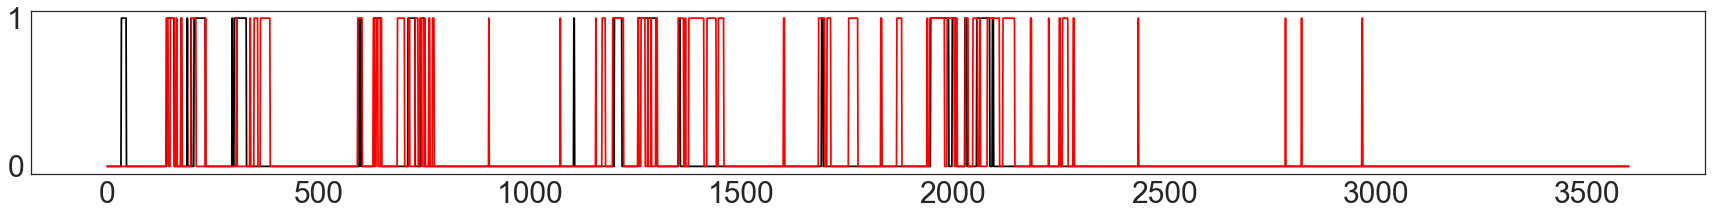

In [17]:
# - [ ]写代码整理每10分钟进食时间的数据

# single:
data_eye = pd.read_csv('/Volumes/HaoZHard2/result/20171214000_PW_0_eye_60min.csv')
#print(len(data_eye))
# print(data_eye)

data_eye_a = np.zeros(3600)
data_eye_count_list = []
data_eye_time_list = []
for i in range(len(data_eye)):
    data_eye_a[int(data_eye['start'][i])]=1
for i in range(6):
    data_eye_count_list.append(np.count_nonzero(data_eye_a[600*i:600*(i+1)]))
print(data_eye_count_list)
for i in range(len(data_eye)):
    data_eye_a[int(data_eye['start'][i]):int(data_eye['end'][i])]=1
for i in range(6):
    data_eye_time_list.append(np.count_nonzero(data_eye_a[600*i:600*(i+1)]))
print(data_eye_time_list)






data_ele = pd.read_csv('/Volumes/HaoZHard2/LimeOne/chart/20171214000_PW_4_0/bout_time_CH_0.csv')
# print(data_ele)
data_ele_a = np.zeros(3600)
for i in range(len(data_ele)):
    data_ele_a[int(data_ele['start'][i]):int(data_ele['end'][i])]=1

# count


plt.figure(figsize=(30,3))
plt.plot(data_eye_a, 'k')
plt.plot(data_ele_a, 'r')
plt.show()
plt.close('all')
# print('Finish')

In [17]:
def eye_ele_count_time_10min_result(data_eye,data_ele):
    #data_eye = pd.read_csv('/Volumes/HaoZHard2/result/20171214000_PW_0_eye_60min.csv')
    data_eye_a = np.zeros(4000)
    data_eye_count_list = []
    data_eye_time_list = []
    for i in range(len(data_eye)):
        data_eye_a[int(data_eye['start'][i])]=1
    for i in range(6):
        data_eye_count_list.append(np.count_nonzero(data_eye_a[600*i:600*(i+1)]))
#     print(data_eye_count_list)
    for i in range(len(data_eye)):
        data_eye_a[int(data_eye['start'][i]):int(data_eye['end'][i])]=1
    for i in range(6):
        data_eye_time_list.append(np.count_nonzero(data_eye_a[600*i:600*(i+1)]))
#     print(data_eye_time_list)
    #data_ele = pd.read_csv('/Volumes/HaoZHard2/LimeOne/chart/20171214000_PW_4_0/bout_time_CH_0.csv')
    data_ele_a = np.zeros(4000)
    data_ele_count_list = []
    data_ele_time_list = []
    for i in range(len(data_ele)):
        data_ele_a[int(data_ele['start'][i])]=1
    for i in range(6):
        data_ele_count_list.append(np.count_nonzero(data_ele_a[600*i:600*(i+1)]))
#     print(data_ele_count_list)
    for i in range(len(data_ele)):
        data_ele_a[int(data_ele['start'][i]):int(data_ele['end'][i])]=1
    for i in range(6):
        data_ele_time_list.append(np.count_nonzero(data_ele_a[600*i:600*(i+1)]))
#     print(data_ele_time_list)
        
#     plt.figure(figsize=(30,3))
#     plt.plot(data_eye_a, 'k')
#     plt.plot(data_ele_a, 'r')
#     plt.show()
#     plt.close('all')
    print('Finish')
    return(data_eye_count_list, data_eye_time_list, data_ele_count_list, data_ele_time_list)


# ------------------------------------------------------------------------------------------------------------------
# 在多组中进行:
# cankao: frame_start_path = '{}_start'.format(input_path)
list_array = np.empty([48,4])
for i in range(4):
    input_path_1=20171226000+i
    data_eye = pd.read_csv('/Volumes/HaoZHard2/result/{}_PW_0_eye_60min.csv'.format(input_path_1))
    data_ele = pd.read_csv('/Volumes/HaoZHard2/LimeOne/chart/{}_PW_4_0/bout_time_CH_0.csv'.format(input_path_1))
    [a,b,c,d]=eye_ele_count_time_10min_result(data_eye,data_ele)
    data_eye = pd.read_csv('/Volumes/HaoZHard2/result/{}_PW_1_eye_60min.csv'.format(input_path_1))
    data_ele = pd.read_csv('/Volumes/HaoZHard2/LimeOne/chart/{}_PW_4_1/bout_time_CH_1.csv'.format(input_path_1))
    [e,f,g,h]=eye_ele_count_time_10min_result(data_eye,data_ele)
    list_array[12*i:12*(i+1)-6,0] = np.array(a)
    list_array[12*i:12*(i+1)-6,1] = np.array(b)
    list_array[12*i:12*(i+1)-6,2] = np.array(c)
    list_array[12*i:12*(i+1)-6,3] = np.array(d)
    list_array[12*i+6:12*(i+1),0] = np.array(e)
    list_array[12*i+6:12*(i+1),1] = np.array(f)
    list_array[12*i+6:12*(i+1),2] = np.array(g)
    list_array[12*i+6:12*(i+1),3] = np.array(h)
#     print(np.around(list_array, decimals=1))

np.savetxt('test.csv', np.around(list_array, decimals=1), delimiter=",")

Finish
Finish
Finish
Finish
Finish
Finish
Finish
Finish


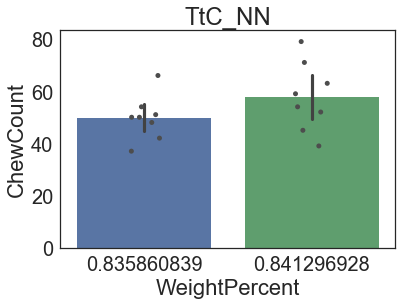

Ttest_indResult(statistic=-1.4405814948929163, pvalue=0.17169195899618894)


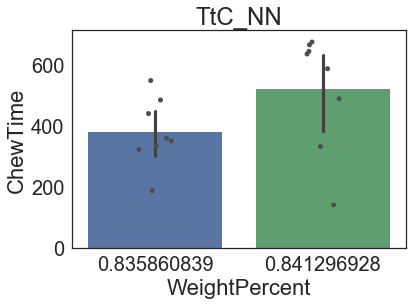

Ttest_indResult(statistic=-1.8198257693907007, pvalue=0.090229519444531309)


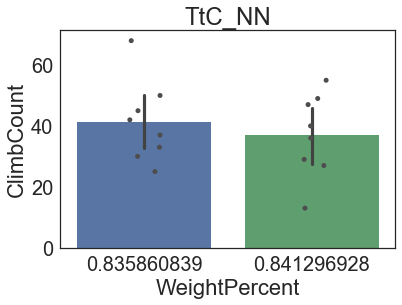

Ttest_indResult(statistic=0.62354963369821781, pvalue=0.54294971709918249)


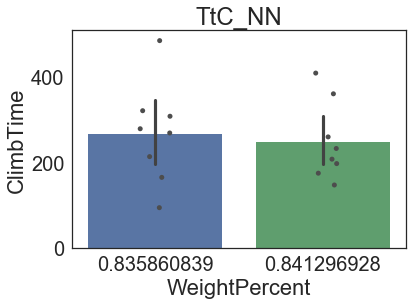

Ttest_indResult(statistic=0.34701116771397639, pvalue=0.73374388732210127)


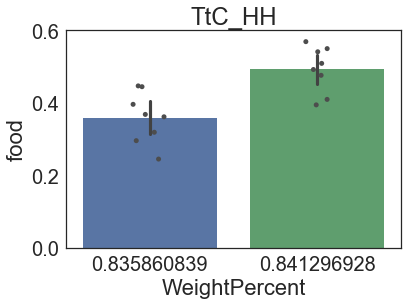

Ttest_indResult(statistic=-3.9465788799382522, pvalue=0.0014615512017555927)


In [14]:
# - [-]数据中导入限食组的体重和与控制组的体重百分比
a = data[(data.StudyID=='TtC_HH')]
x_item = 'WeightPercent'
#做图
# seeborn.set做调整
sns.set(font_scale=2)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x=x_item,jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x=x_item)
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Batch=='20171215']['ChewCount'], a[a.Batch=='20171216']['ChewCount']))

sns.stripplot(data=a,y='ChewTime',x=x_item,jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x=x_item)
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Batch=='20171215']['ChewTime'], a[a.Batch=='20171216']['ChewTime']))

sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x=x_item,jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x=x_item)
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Batch=='20171215']['ClimbCount'], a[a.Batch=='20171216']['ClimbCount']))

sns.stripplot(data=a,y='ClimbTime',x=x_item,jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x=x_item)
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Batch=='20171215']['ClimbTime'], a[a.Batch=='20171216']['ClimbTime']))

sns.set_style('white') 
sns.stripplot(data=a,y='food',x=x_item,jitter=True,color=".3")
sns.barplot(data=a,y='food',x=x_item)
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Batch=='20171215']['food'], a[a.Batch=='20171216']['food']))

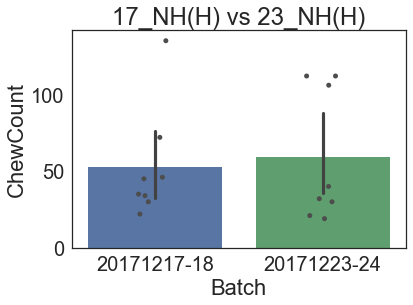

Ttest_indResult(statistic=-0.33294974405281402, pvalue=0.74410569767942114)
Ttest_relResult(statistic=-0.31638790722525378, pvalue=0.76093403600055409)


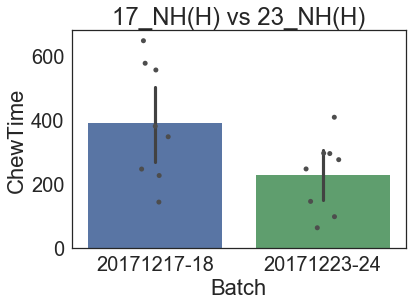

Ttest_indResult(statistic=2.0973261696101591, pvalue=0.054602532378798641)
Ttest_relResult(statistic=1.9799094330920646, pvalue=0.088193573478271531)


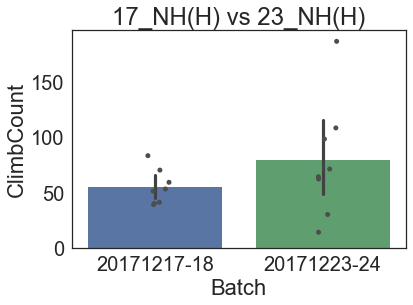

Ttest_indResult(statistic=-1.2545734964148083, pvalue=0.23017487877766207)
Ttest_relResult(statistic=-1.610654917974162, pvalue=0.15129020622052669)


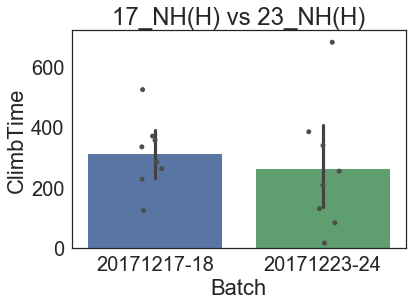

Ttest_indResult(statistic=0.56813424896925224, pvalue=0.57894272006961556)
Ttest_relResult(statistic=1.2104800907914615, pvalue=0.26537636132404335)


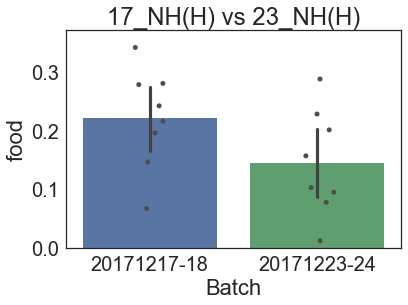

Ttest_indResult(statistic=1.7182976657539171, pvalue=0.10776757364662186)
Ttest_relResult(statistic=3.4925678933283821, pvalue=0.010093644185831956)


In [8]:
# - [-]看两天不同的NH中, N内是否有差异, H内是否有差异
a = data[(data.StudyID=='TtC_NH')&(data.Cage==1)]
#做图
# seeborn.set做调整
sns.set(font_scale=2)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="Batch",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="Batch")
plt.title('17_NH(H) vs 23_NH(H)')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Batch=='20171217-18']['ChewCount'], a[a.Batch=='20171223-24']['ChewCount']))
print(stats.ttest_rel(a[a.Batch=='20171217-18']['ChewCount'], a[a.Batch=='20171223-24']['ChewCount']))
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

sns.stripplot(data=a,y='ChewTime',x="Batch",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="Batch")
plt.title('17_NH(H) vs 23_NH(H)')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Batch=='20171217-18']['ChewTime'], a[a.Batch=='20171223-24']['ChewTime']))
print(stats.ttest_rel(a[a.Batch=='20171217-18']['ChewTime'], a[a.Batch=='20171223-24']['ChewTime']))


sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="Batch",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="Batch")
plt.title('17_NH(H) vs 23_NH(H)')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Batch=='20171217-18']['ClimbCount'], a[a.Batch=='20171223-24']['ClimbCount']))
print(stats.ttest_rel(a[a.Batch=='20171217-18']['ClimbCount'], a[a.Batch=='20171223-24']['ClimbCount']))

sns.stripplot(data=a,y='ClimbTime',x="Batch",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="Batch")
plt.title('17_NH(H) vs 23_NH(H)')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Batch=='20171217-18']['ClimbTime'], a[a.Batch=='20171223-24']['ClimbTime']))
print(stats.ttest_rel(a[a.Batch=='20171217-18']['ClimbTime'], a[a.Batch=='20171223-24']['ClimbTime']))


sns.set_style('white') 
sns.stripplot(data=a,y='food',x="Batch",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="Batch")
plt.title('17_NH(H) vs 23_NH(H)')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Batch=='20171217-18']['food'], a[a.Batch=='20171223-24']['food']))
print(stats.ttest_rel(a[a.Batch=='20171217-18']['food'], a[a.Batch=='20171223-24']['food']))

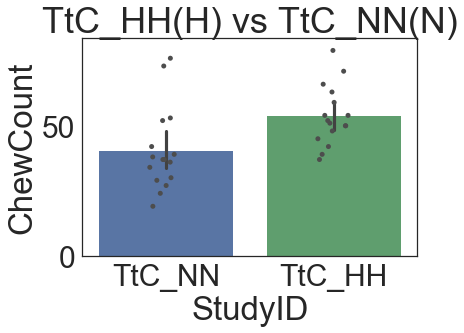

Ttest_indResult(statistic=-2.7102942375979171, pvalue=0.011008026006545157)


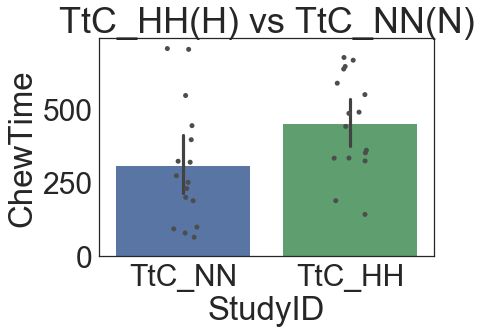

Ttest_indResult(statistic=-2.1550812068552938, pvalue=0.039304851251102481)


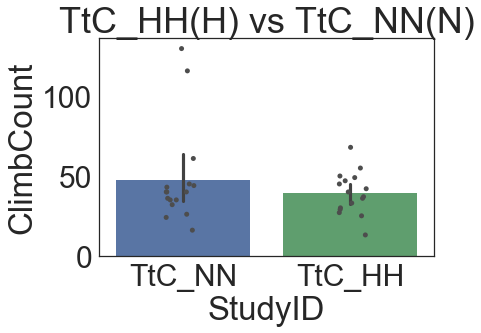

Ttest_indResult(statistic=1.0098840994617204, pvalue=0.32062716123431773)


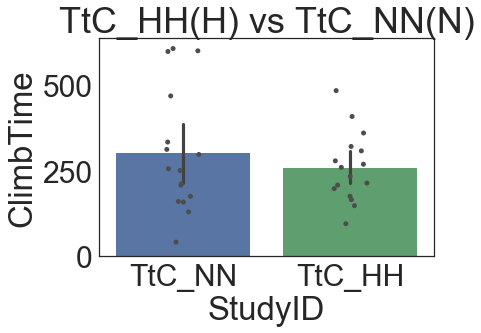

Ttest_indResult(statistic=0.83298190784450443, pvalue=0.41143770108288547)


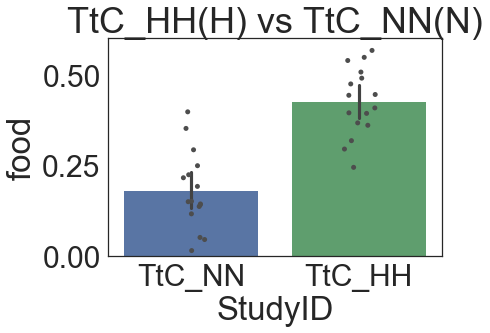

Ttest_indResult(statistic=-6.8967700629566213, pvalue=1.1736718593187169e-07)


In [13]:
# N和H的差别
a = data[(data.StudyID!='TtC_NH')]
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="StudyID")
plt.title('TtC_HH(H) vs TtC_NN(N)')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ChewCount'], a[a.StudyID=='TtC_HH']['ChewCount']))

sns.stripplot(data=a,y='ChewTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="StudyID")
plt.title('TtC_HH(H) vs TtC_NN(N)')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ChewTime'], a[a.StudyID=='TtC_HH']['ChewTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="StudyID")
plt.title('TtC_HH(H) vs TtC_NN(N)')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ClimbCount'], a[a.StudyID=='TtC_HH']['ClimbCount']))

sns.stripplot(data=a,y='ClimbTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="StudyID")
plt.title('TtC_HH(H) vs TtC_NN(N)')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ClimbTime'], a[a.StudyID=='TtC_HH']['ClimbTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="StudyID")
plt.title('TtC_HH(H) vs TtC_NN(N)')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['food'], a[a.StudyID=='TtC_HH']['food']))




- 总结
    - 进食次数和时间及食物重量上, 限食组要显著高于正常组
    - 攀爬行为二者无显著差别

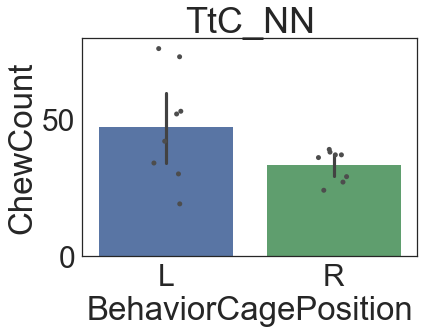

Ttest_indResult(statistic=1.8884495154960776, pvalue=0.079863649730100669)


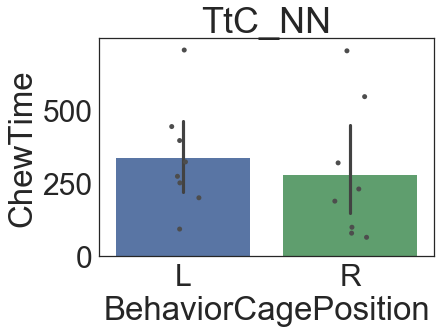

Ttest_indResult(statistic=0.54027171434850252, pvalue=0.59750009218974398)


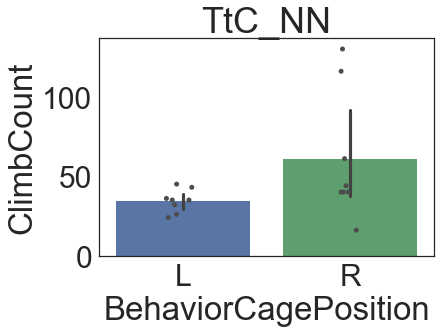

Ttest_indResult(statistic=-1.8172011081742354, pvalue=0.090648856594764252)


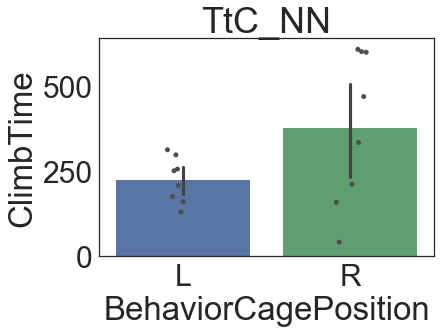

Ttest_indResult(statistic=-1.8658035542923677, pvalue=0.083159639544310382)


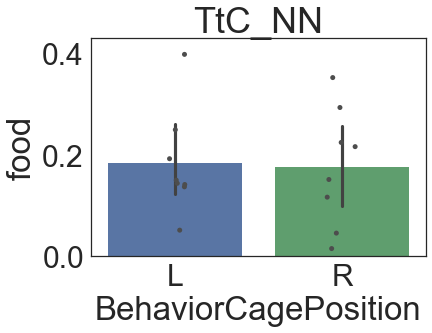

Ttest_indResult(statistic=0.1102652484702499, pvalue=0.91376408726722114)


In [15]:
# NN中,LR的差别
a = data[(data.StudyID=='TtC_NN')]
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="BehaviorCagePosition",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="BehaviorCagePosition")
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.BehaviorCagePosition=='L']['ChewCount'], a[a.BehaviorCagePosition=='R']['ChewCount']))

sns.stripplot(data=a,y='ChewTime',x="BehaviorCagePosition",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="BehaviorCagePosition")
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.BehaviorCagePosition=='L']['ChewTime'], a[a.BehaviorCagePosition=='R']['ChewTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="BehaviorCagePosition",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="BehaviorCagePosition")
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.BehaviorCagePosition=='L']['ClimbCount'], a[a.BehaviorCagePosition=='R']['ClimbCount']))

sns.stripplot(data=a,y='ClimbTime',x="BehaviorCagePosition",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="BehaviorCagePosition")
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.BehaviorCagePosition=='L']['ClimbTime'], a[a.BehaviorCagePosition=='R']['ClimbTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="BehaviorCagePosition",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="BehaviorCagePosition")
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.BehaviorCagePosition=='L']['food'], a[a.BehaviorCagePosition=='R']['food']))





- 总结
    - L的小鼠更倾向于吃更多的食物
    - R的小鼠更倾向于更多的攀爬行为
    - 食物重量上L和R表现的无差异
    - 并无显著性差异但存在趋势
    - **L和R有额外的未知变量对攀爬和进食行为作出影响**

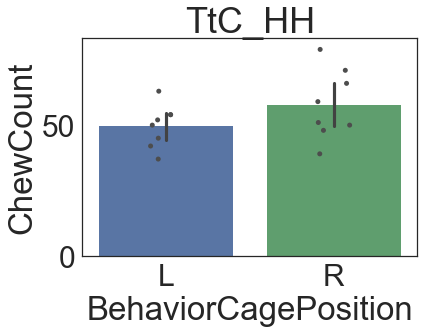

Ttest_indResult(statistic=-1.4926386664272804, pvalue=0.15772167655931837)


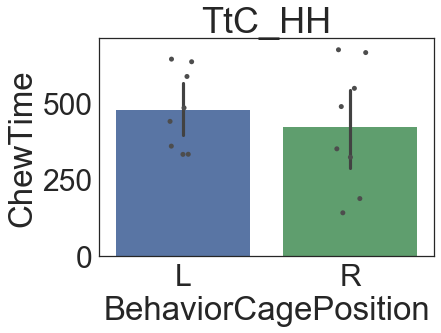

Ttest_indResult(statistic=0.63402052871989101, pvalue=0.53628989028060392)


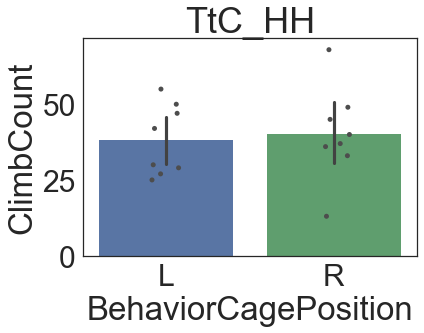

Ttest_indResult(statistic=-0.29031330890382223, pvalue=0.77583240284215593)


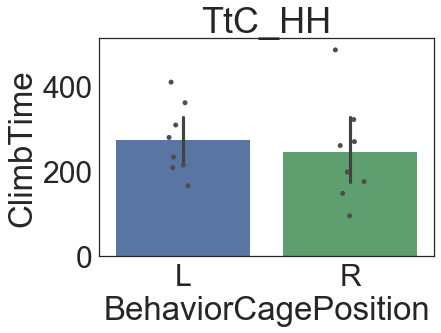

Ttest_indResult(statistic=0.54494894390860582, pvalue=0.59436399406580565)


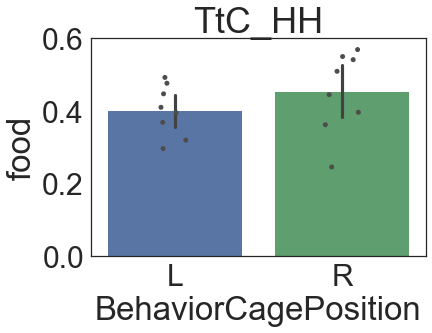

Ttest_indResult(statistic=-1.1010802234028556, pvalue=0.2894331055684442)


In [16]:
# HH中,LR的差别
a = data[(data.StudyID=='TtC_HH')]
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="BehaviorCagePosition",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="BehaviorCagePosition")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.BehaviorCagePosition=='L']['ChewCount'], a[a.BehaviorCagePosition=='R']['ChewCount']))

sns.stripplot(data=a,y='ChewTime',x="BehaviorCagePosition",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="BehaviorCagePosition")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.BehaviorCagePosition=='L']['ChewTime'], a[a.BehaviorCagePosition=='R']['ChewTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="BehaviorCagePosition",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="BehaviorCagePosition")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.BehaviorCagePosition=='L']['ClimbCount'], a[a.BehaviorCagePosition=='R']['ClimbCount']))

sns.stripplot(data=a,y='ClimbTime',x="BehaviorCagePosition",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="BehaviorCagePosition")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.BehaviorCagePosition=='L']['ClimbTime'], a[a.BehaviorCagePosition=='R']['ClimbTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="BehaviorCagePosition",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="BehaviorCagePosition")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.BehaviorCagePosition=='L']['food'], a[a.BehaviorCagePosition=='R']['food']))






- 总结
    - 限食组的小鼠与之前对照组小鼠的数据比较来看'对外界表现的就更加的专一'
    - 限食组小鼠**在进食和攀爬上都无显著差异和趋势**

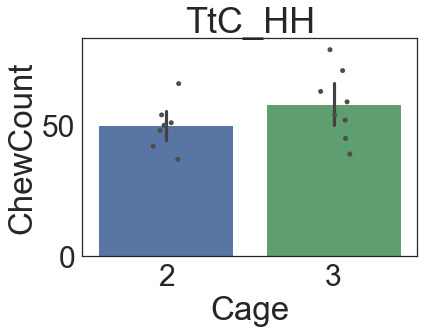

Ttest_indResult(statistic=-1.4405814948929163, pvalue=0.17169195899618894)


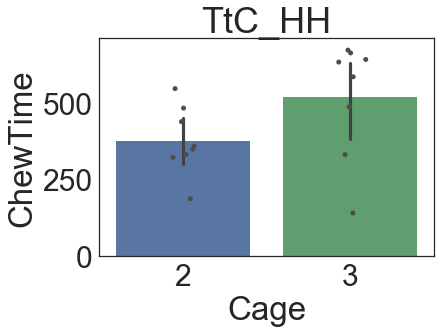

Ttest_indResult(statistic=-1.8198257693907007, pvalue=0.090229519444531309)


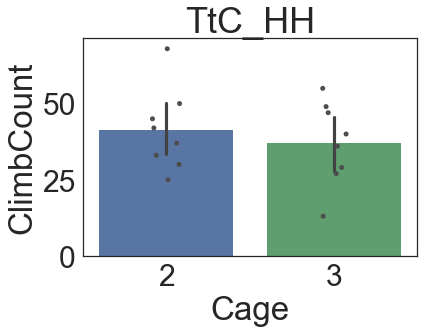

Ttest_indResult(statistic=0.62354963369821781, pvalue=0.54294971709918249)


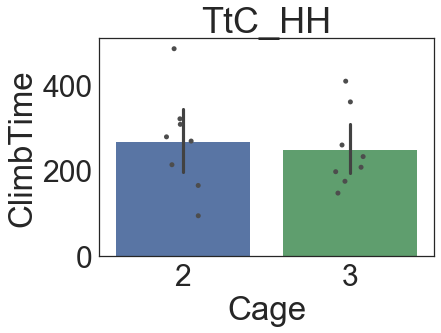

Ttest_indResult(statistic=0.34701116771397639, pvalue=0.73374388732210127)


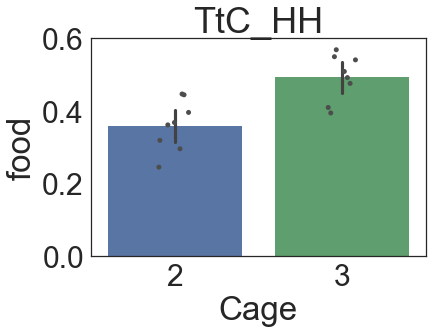

Ttest_indResult(statistic=-3.9465788799382522, pvalue=0.0014615512017555927)


In [5]:
# HH中,cage2和cage3的差别
a = data[(data.StudyID=='TtC_HH')]
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="Cage",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="Cage")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Cage==2]['ChewCount'], a[a.Cage==3]['ChewCount']))

sns.stripplot(data=a,y='ChewTime',x="Cage",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="Cage")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Cage==2]['ChewTime'], a[a.Cage==3]['ChewTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="Cage",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="Cage")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Cage==2]['ClimbCount'], a[a.Cage==3]['ClimbCount']))

sns.stripplot(data=a,y='ClimbTime',x="Cage",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="Cage")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Cage==2]['ClimbTime'], a[a.Cage==3]['ClimbTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="Cage",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="Cage")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Cage==2]['food'], a[a.Cage==3]['food']))

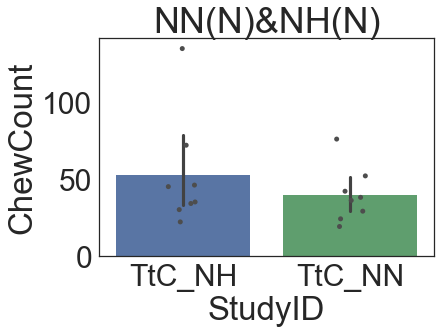

 Two Sample TTest:  0.387131757317
 Paired TTest:  0.448159592093


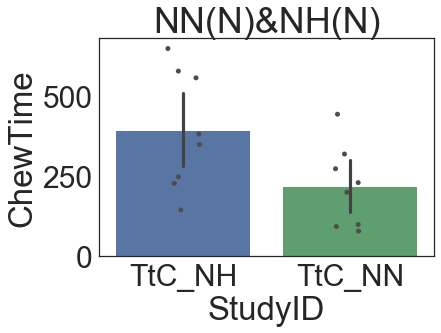

 Two Sample TTest:  0.0449500352043
 Paired TTest:  0.0544516000405


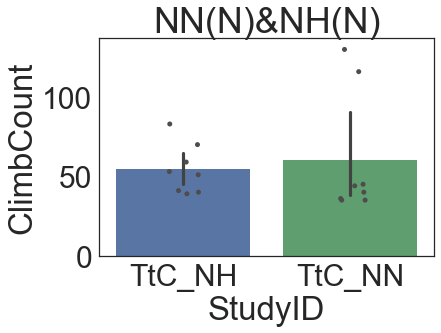

 Two Sample TTest:  0.711784821715
 Paired TTest:  0.633274161048


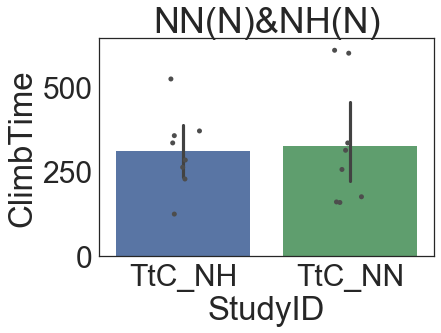

 Two Sample TTest:  0.84535686646
 Paired TTest:  0.707005119579


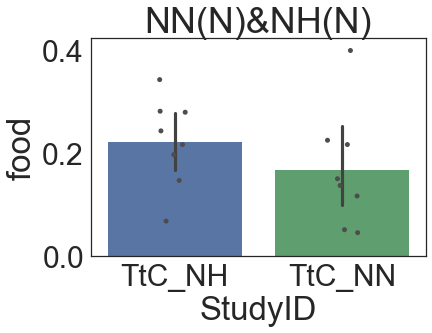

 Two Sample TTest:  0.302469358439
 Paired TTest:  0.220634421019


In [42]:
# NN和NH中N的差别-采用1笼的小鼠就行
a = data[(data.StudyID!='TtC_HH')&(data.Cage==1)&(data.Date>=20171217)&(data.Date<=20171219)]
# print(a)
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="StudyID")
plt.title('NN(N)&NH(N)')
plt.show()
plt.close('all')
# ttest
PTTest(SampleA=a[a.StudyID=='TtC_NN']['ChewCount'],SampleB=a[a.StudyID=='TtC_NH']['ChewCount'])




sns.stripplot(data=a,y='ChewTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="StudyID")
plt.title('NN(N)&NH(N)')
plt.show()
plt.close('all')
# ttest
# print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ChewTime'], a[a.StudyID=='TtC_NH']['ChewTime']))
# print(stats.ttest_rel(a[a.StudyID=='TtC_NN']['ChewTime'], a[a.StudyID=='TtC_NH']['ChewTime']))
PTTest(SampleA=a[a.StudyID=='TtC_NN']['ChewTime'],SampleB=a[a.StudyID=='TtC_NH']['ChewTime'])




sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="StudyID")
plt.title('NN(N)&NH(N)')
plt.show()
plt.close('all')
# ttest
# print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ClimbCount'], a[a.StudyID=='TtC_NH']['ClimbCount']))
# print(stats.ttest_rel(a[a.StudyID=='TtC_NN']['ClimbCount'], a[a.StudyID=='TtC_NH']['ClimbCount']))
PTTest(SampleA=a[a.StudyID=='TtC_NN']['ClimbCount'],SampleB=a[a.StudyID=='TtC_NH']['ClimbCount'])



sns.stripplot(data=a,y='ClimbTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="StudyID")
plt.title('NN(N)&NH(N)')
plt.show()
plt.close('all')
# ttest
# print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ClimbTime'], a[a.StudyID=='TtC_NH']['ClimbTime']))
# print(stats.ttest_rel(a[a.StudyID=='TtC_NN']['ClimbTime'], a[a.StudyID=='TtC_NH']['ClimbTime']))
PTTest(SampleA=a[a.StudyID=='TtC_NN']['ClimbTime'],SampleB=a[a.StudyID=='TtC_NH']['ClimbTime'])



sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="StudyID")
plt.title('NN(N)&NH(N)')
plt.show()
plt.close('all')
# ttest
# print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['food'], a[a.StudyID=='TtC_NH']['food']))
# print(stats.ttest_rel(a[a.StudyID=='TtC_NN']['food'], a[a.StudyID=='TtC_NH']['food']))
PTTest(SampleA=a[a.StudyID=='TtC_NN']['food'],SampleB=a[a.StudyID=='TtC_NH']['food'])







- 总结
    - **在进食时间上, NH(N)显著高于NN(N)**
    - NH(N)消耗食物的重量有高于NN(N)的趋势
    - 攀爬行为上, 二者无差异和趋势的表现
    

   StudyID  Cage  Mice  oppositeCage  oppositeMice BehaviorCagePosition  \
9   TtC_NH     2     1             1             1                    R   
11  TtC_NH     2     2             1             2                    R   
13  TtC_NH     2     3             1             3                    R   
15  TtC_NH     2     4             1             4                    R   
17  TtC_NH     2     5             1             5                    R   
19  TtC_NH     2     6             1             6                    R   
21  TtC_NH     2     7             1             7                    R   
23  TtC_NH     2     8             1             8                    R   
24  TtC_HH     2     1             2             2                    L   
25  TtC_HH     2     2             2             1                    R   
26  TtC_HH     2     3             2             4                    L   
27  TtC_HH     2     4             2             3                    R   
28  TtC_HH     2     5   

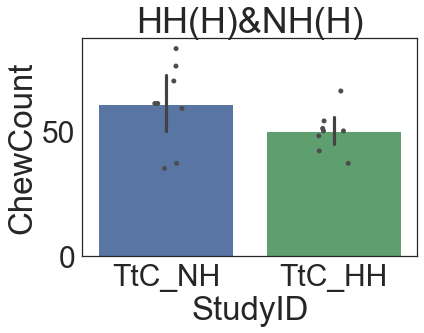

 Two Sample TTest:  0.142088651999
 Paired TTest:  0.0645558062974


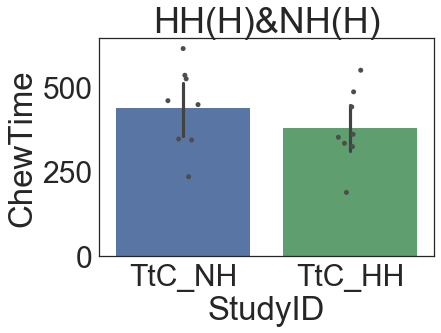

 Two Sample TTest:  0.334955965668
 Paired TTest:  0.30038336046


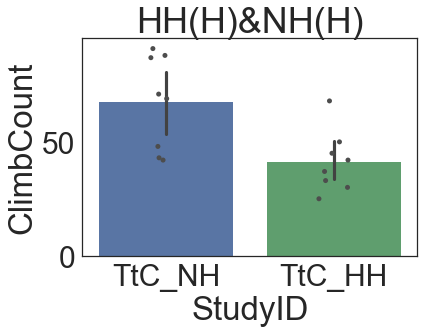

 Two Sample TTest:  0.00978430460379
 Paired TTest:  0.0155187906556


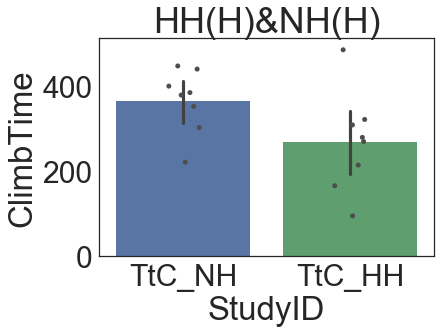

 Two Sample TTest:  0.0641411729595
 Paired TTest:  0.0152671892146


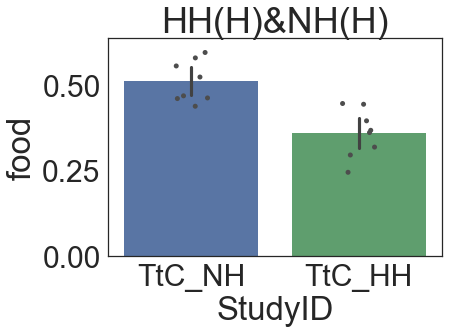

 Two Sample TTest:  0.000420887111176
 Paired TTest:  1.87541325279e-05


In [43]:
# HH和NH中H的差别-关注2笼就行
a = data[(data.Date>=20171215)&(data.Date<=20171218)&(data.Cage==2)]
print(a)
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="StudyID")
plt.title('HH(H)&NH(H)')
plt.show()
plt.close('all')
# ttest
# print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['ChewCount'], a[a.StudyID=='TtC_NH']['ChewCount']))
# print(stats.ttest_rel(a[a.StudyID=='TtC_HH']['ChewCount'], a[a.StudyID=='TtC_NH']['ChewCount']))
PTTest(SampleA=a[a.StudyID=='TtC_HH']['ChewCount'],SampleB=a[a.StudyID=='TtC_NH']['ChewCount'])



sns.stripplot(data=a,y='ChewTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="StudyID")
plt.title('HH(H)&NH(H)')
plt.show()
plt.close('all')
# ttest
# print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['ChewTime'], a[a.StudyID=='TtC_NH']['ChewTime']))
# print(stats.ttest_rel(a[a.StudyID=='TtC_HH']['ChewTime'], a[a.StudyID=='TtC_NH']['ChewTime']))
PTTest(SampleA=a[a.StudyID=='TtC_HH']['ChewTime'],SampleB=a[a.StudyID=='TtC_NH']['ChewTime'])



sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="StudyID")
plt.title('HH(H)&NH(H)')
plt.show()
plt.close('all')
# ttest
# print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['ClimbCount'], a[a.StudyID=='TtC_NH']['ClimbCount']))
# print(stats.ttest_rel(a[a.StudyID=='TtC_HH']['ClimbCount'], a[a.StudyID=='TtC_NH']['ClimbCount']))
PTTest(SampleA=a[a.StudyID=='TtC_HH']['ClimbCount'],SampleB=a[a.StudyID=='TtC_NH']['ClimbCount'])



sns.stripplot(data=a,y='ClimbTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="StudyID")
plt.title('HH(H)&NH(H)')
plt.show()
plt.close('all')
# ttest
# print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['ClimbTime'], a[a.StudyID=='TtC_NH']['ClimbTime']))
# print(stats.ttest_rel(a[a.StudyID=='TtC_HH']['ClimbTime'], a[a.StudyID=='TtC_NH']['ClimbTime']))
PTTest(SampleA=a[a.StudyID=='TtC_HH']['ClimbTime'],SampleB=a[a.StudyID=='TtC_NH']['ClimbTime'])



sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="StudyID")
plt.title('HH(H)&NH(H)')
plt.show()
plt.close('all')
# ttest
# print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['food'], a[a.StudyID=='TtC_NH']['food']))
# print(stats.ttest_rel(a[a.StudyID=='TtC_HH']['food'], a[a.StudyID=='TtC_NH']['food']))
PTTest(SampleA=a[a.StudyID=='TtC_HH']['food'],SampleB=a[a.StudyID=='TtC_NH']['food'])



- 总结
    - **NH(H)的攀爬次数显著高于HH(H)**, 攀爬时间也有更高的趋势
    - **NH(H)食物摄入量要及其显著高于HH(H)组**
        - 可能是天之间限食水平不一致导致的

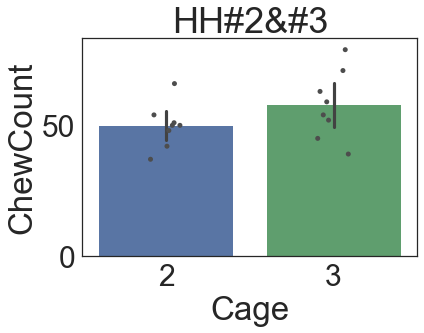

Ttest_indResult(statistic=-1.4405814948929163, pvalue=0.17169195899618894)


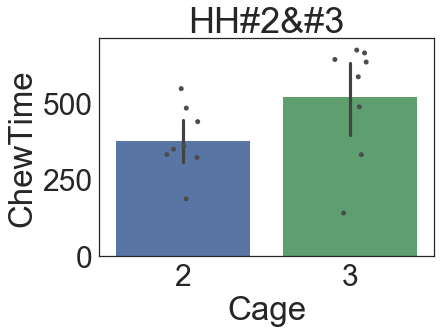

Ttest_indResult(statistic=-1.8198257693907007, pvalue=0.090229519444531309)


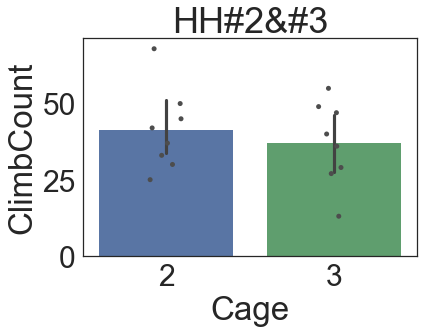

Ttest_indResult(statistic=0.62354963369821781, pvalue=0.54294971709918249)


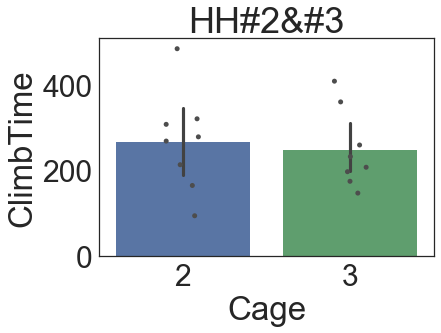

Ttest_indResult(statistic=0.34701116771397639, pvalue=0.73374388732210127)


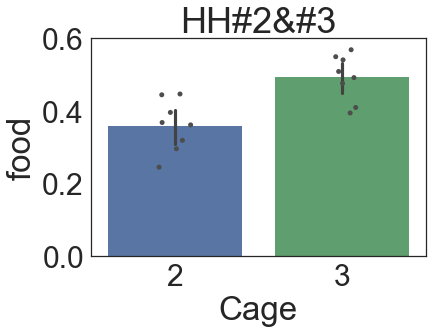

Ttest_indResult(statistic=-3.9465788799382522, pvalue=0.0014615512017555927)


In [36]:
# 笼2笼3之间HH的差别
a = data[(data.StudyID=='TtC_HH')]
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="Cage",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="Cage")
plt.title('HH#2&#3')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Cage==2]['ChewCount'], a[a.Cage==3]['ChewCount']))

sns.stripplot(data=a,y='ChewTime',x="Cage",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="Cage")
plt.title('HH#2&#3')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Cage==2]['ChewTime'], a[a.Cage==3]['ChewTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="Cage",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="Cage")
plt.title('HH#2&#3')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Cage==2]['ClimbCount'], a[a.Cage==3]['ClimbCount']))

sns.stripplot(data=a,y='ClimbTime',x="Cage",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="Cage")
plt.title('HH#2&#3')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Cage==2]['ClimbTime'], a[a.Cage==3]['ClimbTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="Cage",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="Cage")
plt.title('HH#2&#3')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Cage==2]['food'], a[a.Cage==3]['food']))

- 总结
    - 限食组#3在进食次数上比#2偏好更多
    - **限食组#3比#2进食食物重量极其显著更多**

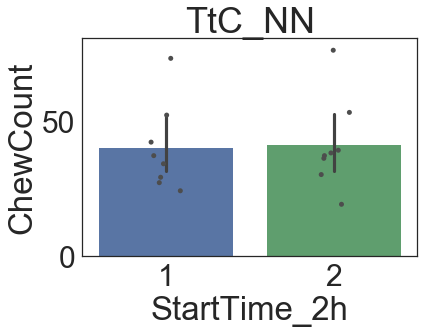

Ttest_indResult(statistic=-0.1506481049028785, pvalue=0.88240233776380794)


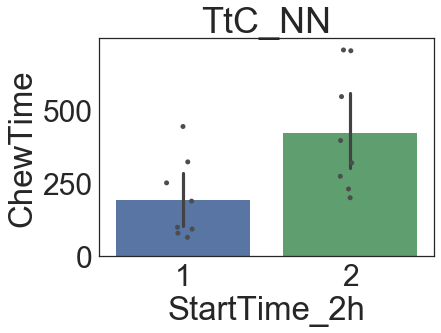

Ttest_indResult(statistic=-2.6267571919294688, pvalue=0.019911953426733985)


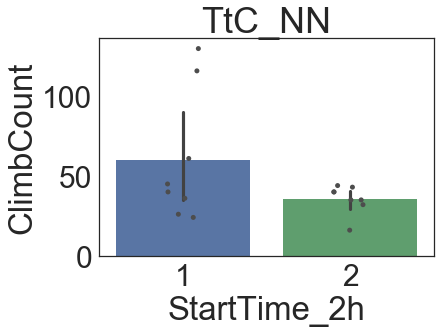

Ttest_indResult(statistic=1.6310561753276027, pvalue=0.1251616024349895)


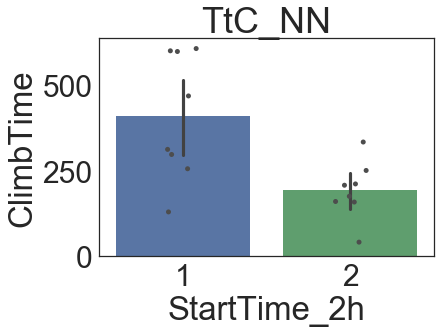

Ttest_indResult(statistic=3.0172568525642087, pvalue=0.009230264752853887)


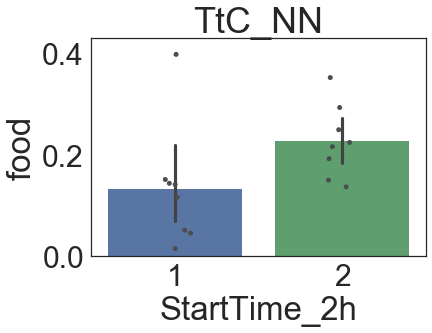

Ttest_indResult(statistic=-1.9112358641048395, pvalue=0.076666509826054163)


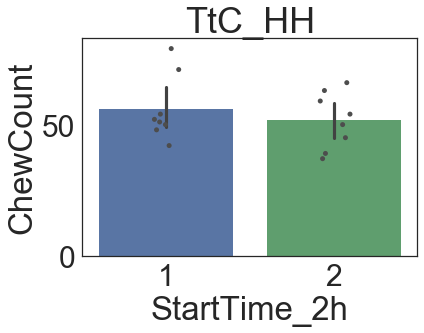

Ttest_indResult(statistic=0.72758043042840204, pvalue=0.47886257677682598)


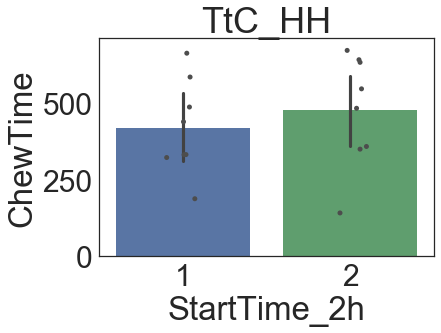

Ttest_indResult(statistic=-0.70049307530973282, pvalue=0.49509715907530105)


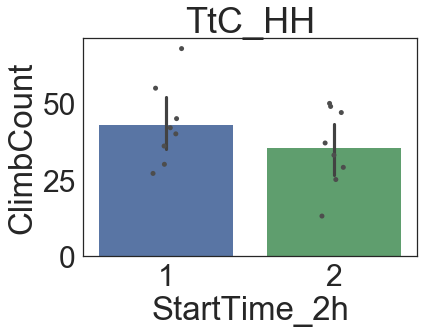

Ttest_indResult(statistic=1.1341827882856852, pvalue=0.27576559893281244)


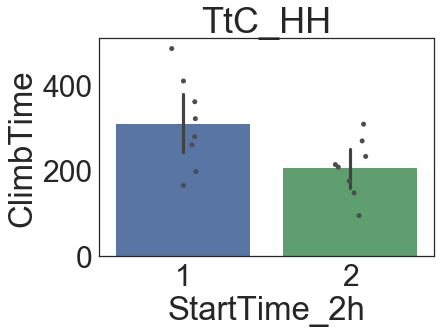

Ttest_indResult(statistic=2.3140070515826601, pvalue=0.036370619400615492)


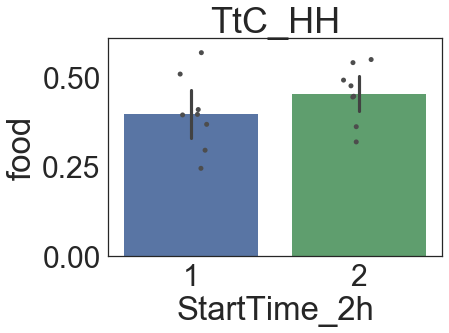

Ttest_indResult(statistic=-1.1887086038973707, pvalue=0.25432739333022997)


In [46]:
# 在NN中, 看前2h和后2h的差别
a = data[(data.StudyID=='TtC_NN')]
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="StartTime_2h",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="StartTime_2h")
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StartTime_2h==1]['ChewCount'], a[a.StartTime_2h==2]['ChewCount']))

sns.stripplot(data=a,y='ChewTime',x="StartTime_2h",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="StartTime_2h")
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StartTime_2h==1]['ChewTime'], a[a.StartTime_2h==2]['ChewTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="StartTime_2h",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="StartTime_2h")
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StartTime_2h==1]['ClimbCount'], a[a.StartTime_2h==2]['ClimbCount']))

sns.stripplot(data=a,y='ClimbTime',x="StartTime_2h",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="StartTime_2h")
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StartTime_2h==1]['ClimbTime'], a[a.StartTime_2h==2]['ClimbTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="StartTime_2h",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="StartTime_2h")
plt.title('TtC_NN')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StartTime_2h==1]['food'], a[a.StartTime_2h==2]['food']))

# 在HH中, 看前2h和后2h的差别
a = data[(data.StudyID=='TtC_HH')]
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="StartTime_2h",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="StartTime_2h")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StartTime_2h==1]['ChewCount'], a[a.StartTime_2h==2]['ChewCount']))

sns.stripplot(data=a,y='ChewTime',x="StartTime_2h",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="StartTime_2h")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StartTime_2h==1]['ChewTime'], a[a.StartTime_2h==2]['ChewTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="StartTime_2h",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="StartTime_2h")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StartTime_2h==1]['ClimbCount'], a[a.StartTime_2h==2]['ClimbCount']))

sns.stripplot(data=a,y='ClimbTime',x="StartTime_2h",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="StartTime_2h")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StartTime_2h==1]['ClimbTime'], a[a.StartTime_2h==2]['ClimbTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="StartTime_2h",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="StartTime_2h")
plt.title('TtC_HH')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StartTime_2h==1]['food'], a[a.StartTime_2h==2]['food']))



- 总结
	- NN
		- 实验都开始与13:00左右
		- 在NN中, 前2h的进食时间要显著小于后2h, 食物消耗量也有增大的趋势
		- 在NN中, 前2h的攀爬次数有趋势大于后2h; 攀爬时间非常显著大于
	- HH
		- 前2h的攀爬时间显著大于后2h; 攀爬次数有大于的趋势
		- 食物消耗上后2h有更多的趋势

   StudyID  Cage  Mice  oppositeCage  oppositeMice BehaviorCagePosition  \
8   TtC_NH     1     1             2             1                    L   
10  TtC_NH     1     2             2             2                    L   
16  TtC_NH     1     5             2             5                    L   
18  TtC_NH     1     6             2             6                    L   
40  TtC_NN     1     1             1             2                    L   
41  TtC_NN     1     2             1             1                    R   
42  TtC_NN     1     3             1             4                    L   
43  TtC_NN     1     4             1             3                    R   

    PositionNum        Batch        Date StartTime      ...        \
8             1  20171217-18  20171217.0         1      ...         
10            1  20171217-18  20171217.0         2      ...         
16            1  20171217-18  20171218.0         1      ...         
18            1  20171217-18  20171218.0        

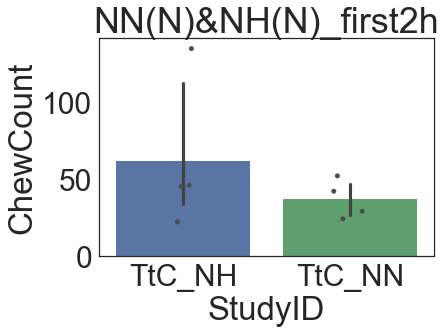

Ttest_indResult(statistic=-0.98058252427184467, pvalue=0.36466768767391922)
Ttest_relResult(statistic=-0.8806614048530339, pvalue=0.44334558948845521)


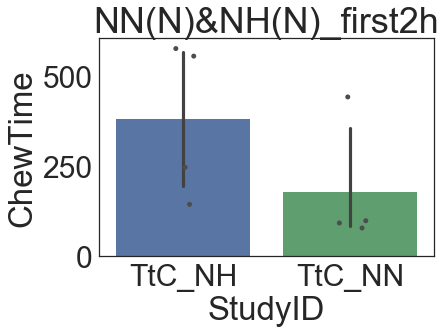

Ttest_indResult(statistic=-1.4462354610980979, pvalue=0.19825155767268185)
Ttest_relResult(statistic=-1.0998817102234399, pvalue=0.35172735216910211)


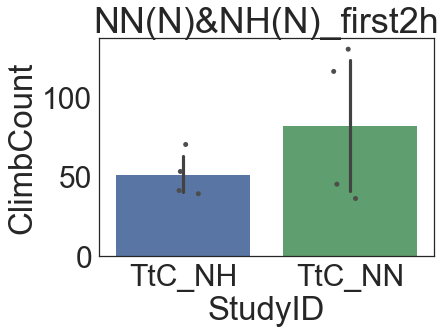

Ttest_indResult(statistic=1.2356008548192248, pvalue=0.26278777638637546)
Ttest_relResult(statistic=1.1172833784009348, pvalue=0.34528980302804968)


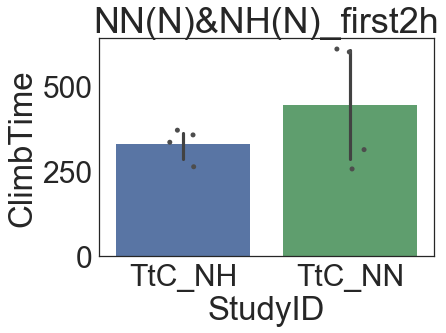

Ttest_indResult(statistic=1.1821744278122055, pvalue=0.28185884701360653)
Ttest_relResult(statistic=1.4063451635271544, pvalue=0.25430706503277867)


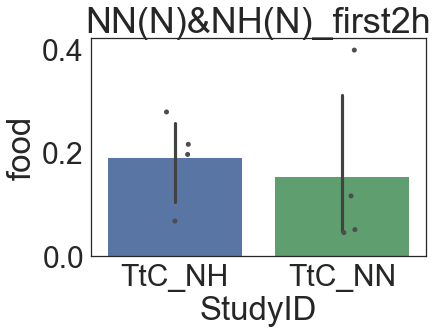

Ttest_indResult(statistic=-0.39144859550713085, pvalue=0.70898957291954012)
Ttest_relResult(statistic=-0.29503460388619851, pvalue=0.78720715259303153)


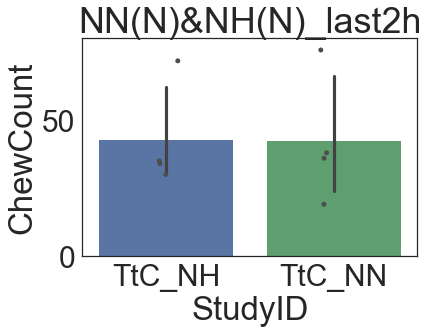

Ttest_indResult(statistic=-0.032210615898901201, pvalue=0.97534885634057211)


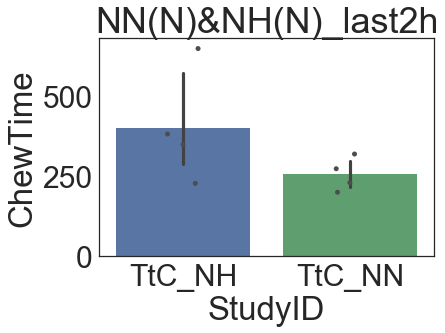

Ttest_indResult(statistic=-1.5792310626806807, pvalue=0.16536240060260682)


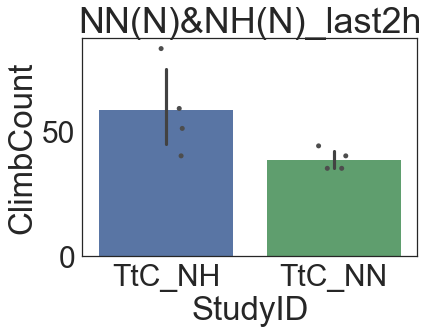

Ttest_indResult(statistic=-2.1056063319387692, pvalue=0.0798563350540855)


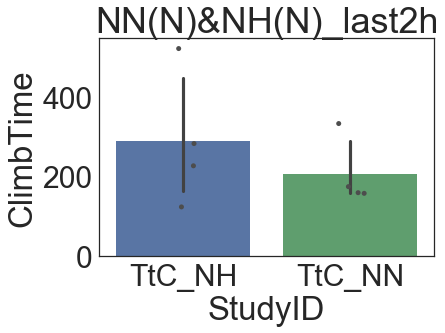

Ttest_indResult(statistic=-0.8740982928158515, pvalue=0.41567605943671992)


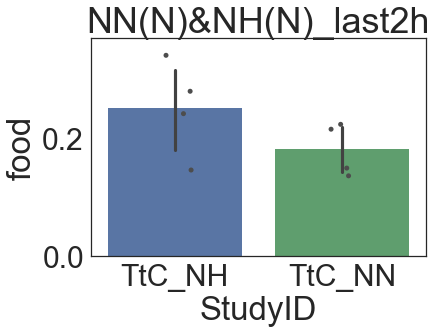

Ttest_indResult(statistic=-1.5247856393829697, pvalue=0.17815416479791887)


ValueError: min() arg is an empty sequence

In [16]:
# NN和NH中N的差别-前2h
a = data[(data.Cage==1)&(data.Date>=20171217)&(data.Date<=20171219)&(data.StartTime_2h=='1')]

print(a)
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="StudyID")
plt.title('NN(N)&NH(N)_first2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ChewCount'], a[a.StudyID=='TtC_NH']['ChewCount']))
print(stats.ttest_rel(a[a.StudyID=='TtC_NN']['ChewCount'], a[a.StudyID=='TtC_NH']['ChewCount']))


sns.stripplot(data=a,y='ChewTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="StudyID")
plt.title('NN(N)&NH(N)_first2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ChewTime'], a[a.StudyID=='TtC_NH']['ChewTime']))
print(stats.ttest_rel(a[a.StudyID=='TtC_NN']['ChewTime'], a[a.StudyID=='TtC_NH']['ChewTime']))


sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="StudyID")
plt.title('NN(N)&NH(N)_first2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ClimbCount'], a[a.StudyID=='TtC_NH']['ClimbCount']))
print(stats.ttest_rel(a[a.StudyID=='TtC_NN']['ClimbCount'], a[a.StudyID=='TtC_NH']['ClimbCount']))


sns.stripplot(data=a,y='ClimbTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="StudyID")
plt.title('NN(N)&NH(N)_first2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ClimbTime'], a[a.StudyID=='TtC_NH']['ClimbTime']))
print(stats.ttest_rel(a[a.StudyID=='TtC_NN']['ClimbTime'], a[a.StudyID=='TtC_NH']['ClimbTime']))


sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="StudyID")
plt.title('NN(N)&NH(N)_first2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['food'], a[a.StudyID=='TtC_NH']['food']))
print(stats.ttest_rel(a[a.StudyID=='TtC_NN']['food'], a[a.StudyID=='TtC_NH']['food']))


# NN和NH中N的差别-后2h
a = data[(data.Cage==1)&(data.Date>=20171217)&(data.Date<=20171219)&(data.StartTime_2h=='2')]

# print(a)
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="StudyID")
plt.title('NN(N)&NH(N)_last2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ChewCount'], a[a.StudyID=='TtC_NH']['ChewCount']))

sns.stripplot(data=a,y='ChewTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="StudyID")
plt.title('NN(N)&NH(N)_last2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ChewTime'], a[a.StudyID=='TtC_NH']['ChewTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="StudyID")
plt.title('NN(N)&NH(N)_last2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ClimbCount'], a[a.StudyID=='TtC_NH']['ClimbCount']))

sns.stripplot(data=a,y='ClimbTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="StudyID")
plt.title('NN(N)&NH(N)_last2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['ClimbTime'], a[a.StudyID=='TtC_NH']['ClimbTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="StudyID")
plt.title('NN(N)&NH(N)_last2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_NN']['food'], a[a.StudyID=='TtC_NH']['food']))



# HH和NH中N的差别-前2h
a = data[(data.StudyID!='TtC_NN')&(data.Cage==2)&(data.StartTime_2h==1)]
# print(a)
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="StudyID")
plt.title('HH(H)&NH(H)_first2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['ChewCount'], a[a.StudyID=='TtC_NH']['ChewCount']))

sns.stripplot(data=a,y='ChewTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="StudyID")
plt.title('HH(H)&NH(H)_first2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['ChewTime'], a[a.StudyID=='TtC_NH']['ChewTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="StudyID")
plt.title('HH(H)&NH(H)_first2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['ClimbCount'], a[a.StudyID=='TtC_NH']['ClimbCount']))

sns.stripplot(data=a,y='ClimbTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="StudyID")
plt.title('HH(H)&NH(H)_first2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['ClimbTime'], a[a.StudyID=='TtC_NH']['ClimbTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="StudyID")
plt.title('HH(H)&NH(H)_first2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['food'], a[a.StudyID=='TtC_NH']['food']))

# HH和NH中N的差别-后2h
a = data[(data.StudyID!='TtC_NN')&(data.Cage==2)&(data.StartTime_2h==2)]
# print(a)
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="StudyID")
plt.title('HH(H)&NH(H)_last2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['ChewCount'], a[a.StudyID=='TtC_NH']['ChewCount']))

sns.stripplot(data=a,y='ChewTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ChewTime',x="StudyID")
plt.title('HH(H)&NH(H)_last2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['ChewTime'], a[a.StudyID=='TtC_NH']['ChewTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ClimbCount',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbCount',x="StudyID")
plt.title('HH(H)&NH(H)_last2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['ClimbCount'], a[a.StudyID=='TtC_NH']['ClimbCount']))

sns.stripplot(data=a,y='ClimbTime',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='ClimbTime',x="StudyID")
plt.title('HH(H)&NH(H)_last2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['ClimbTime'], a[a.StudyID=='TtC_NH']['ClimbTime']))

sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='food',x="StudyID",jitter=True,color=".3")
sns.barplot(data=a,y='food',x="StudyID")
plt.title('HH(H)&NH(H)_last2h')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.StudyID=='TtC_HH']['food'], a[a.StudyID=='TtC_NH']['food']))

- 总结

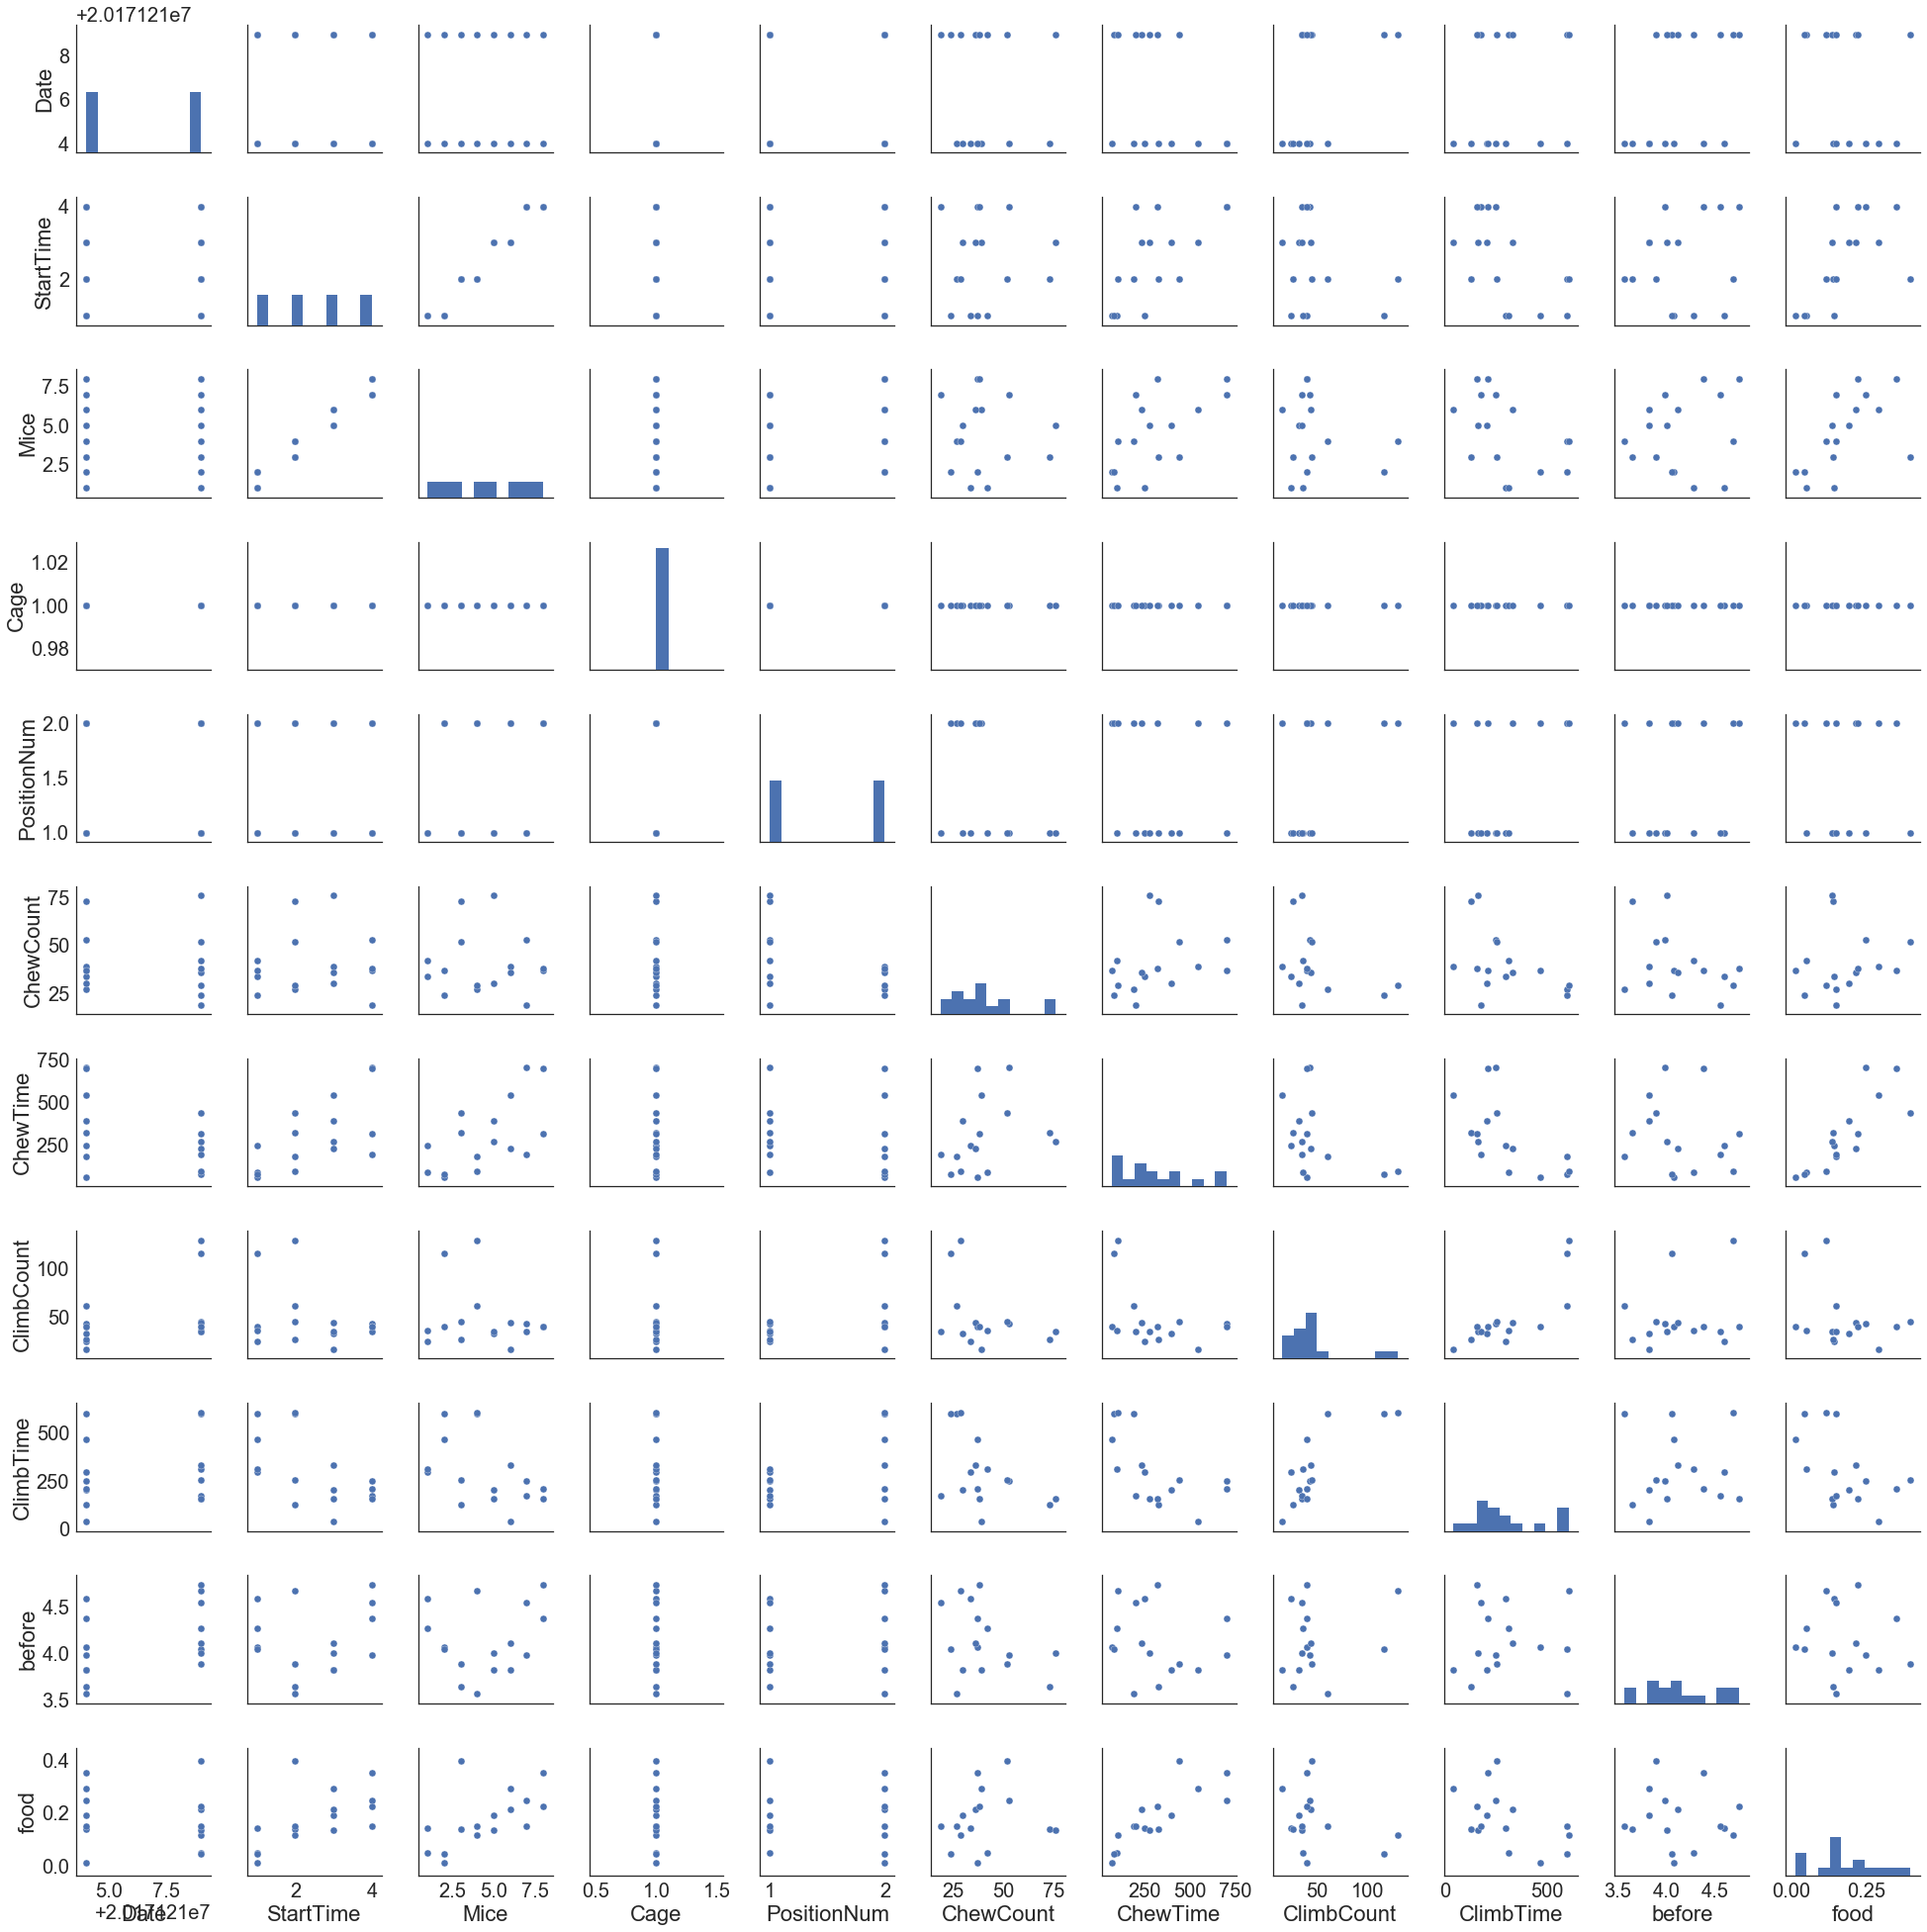

Oh


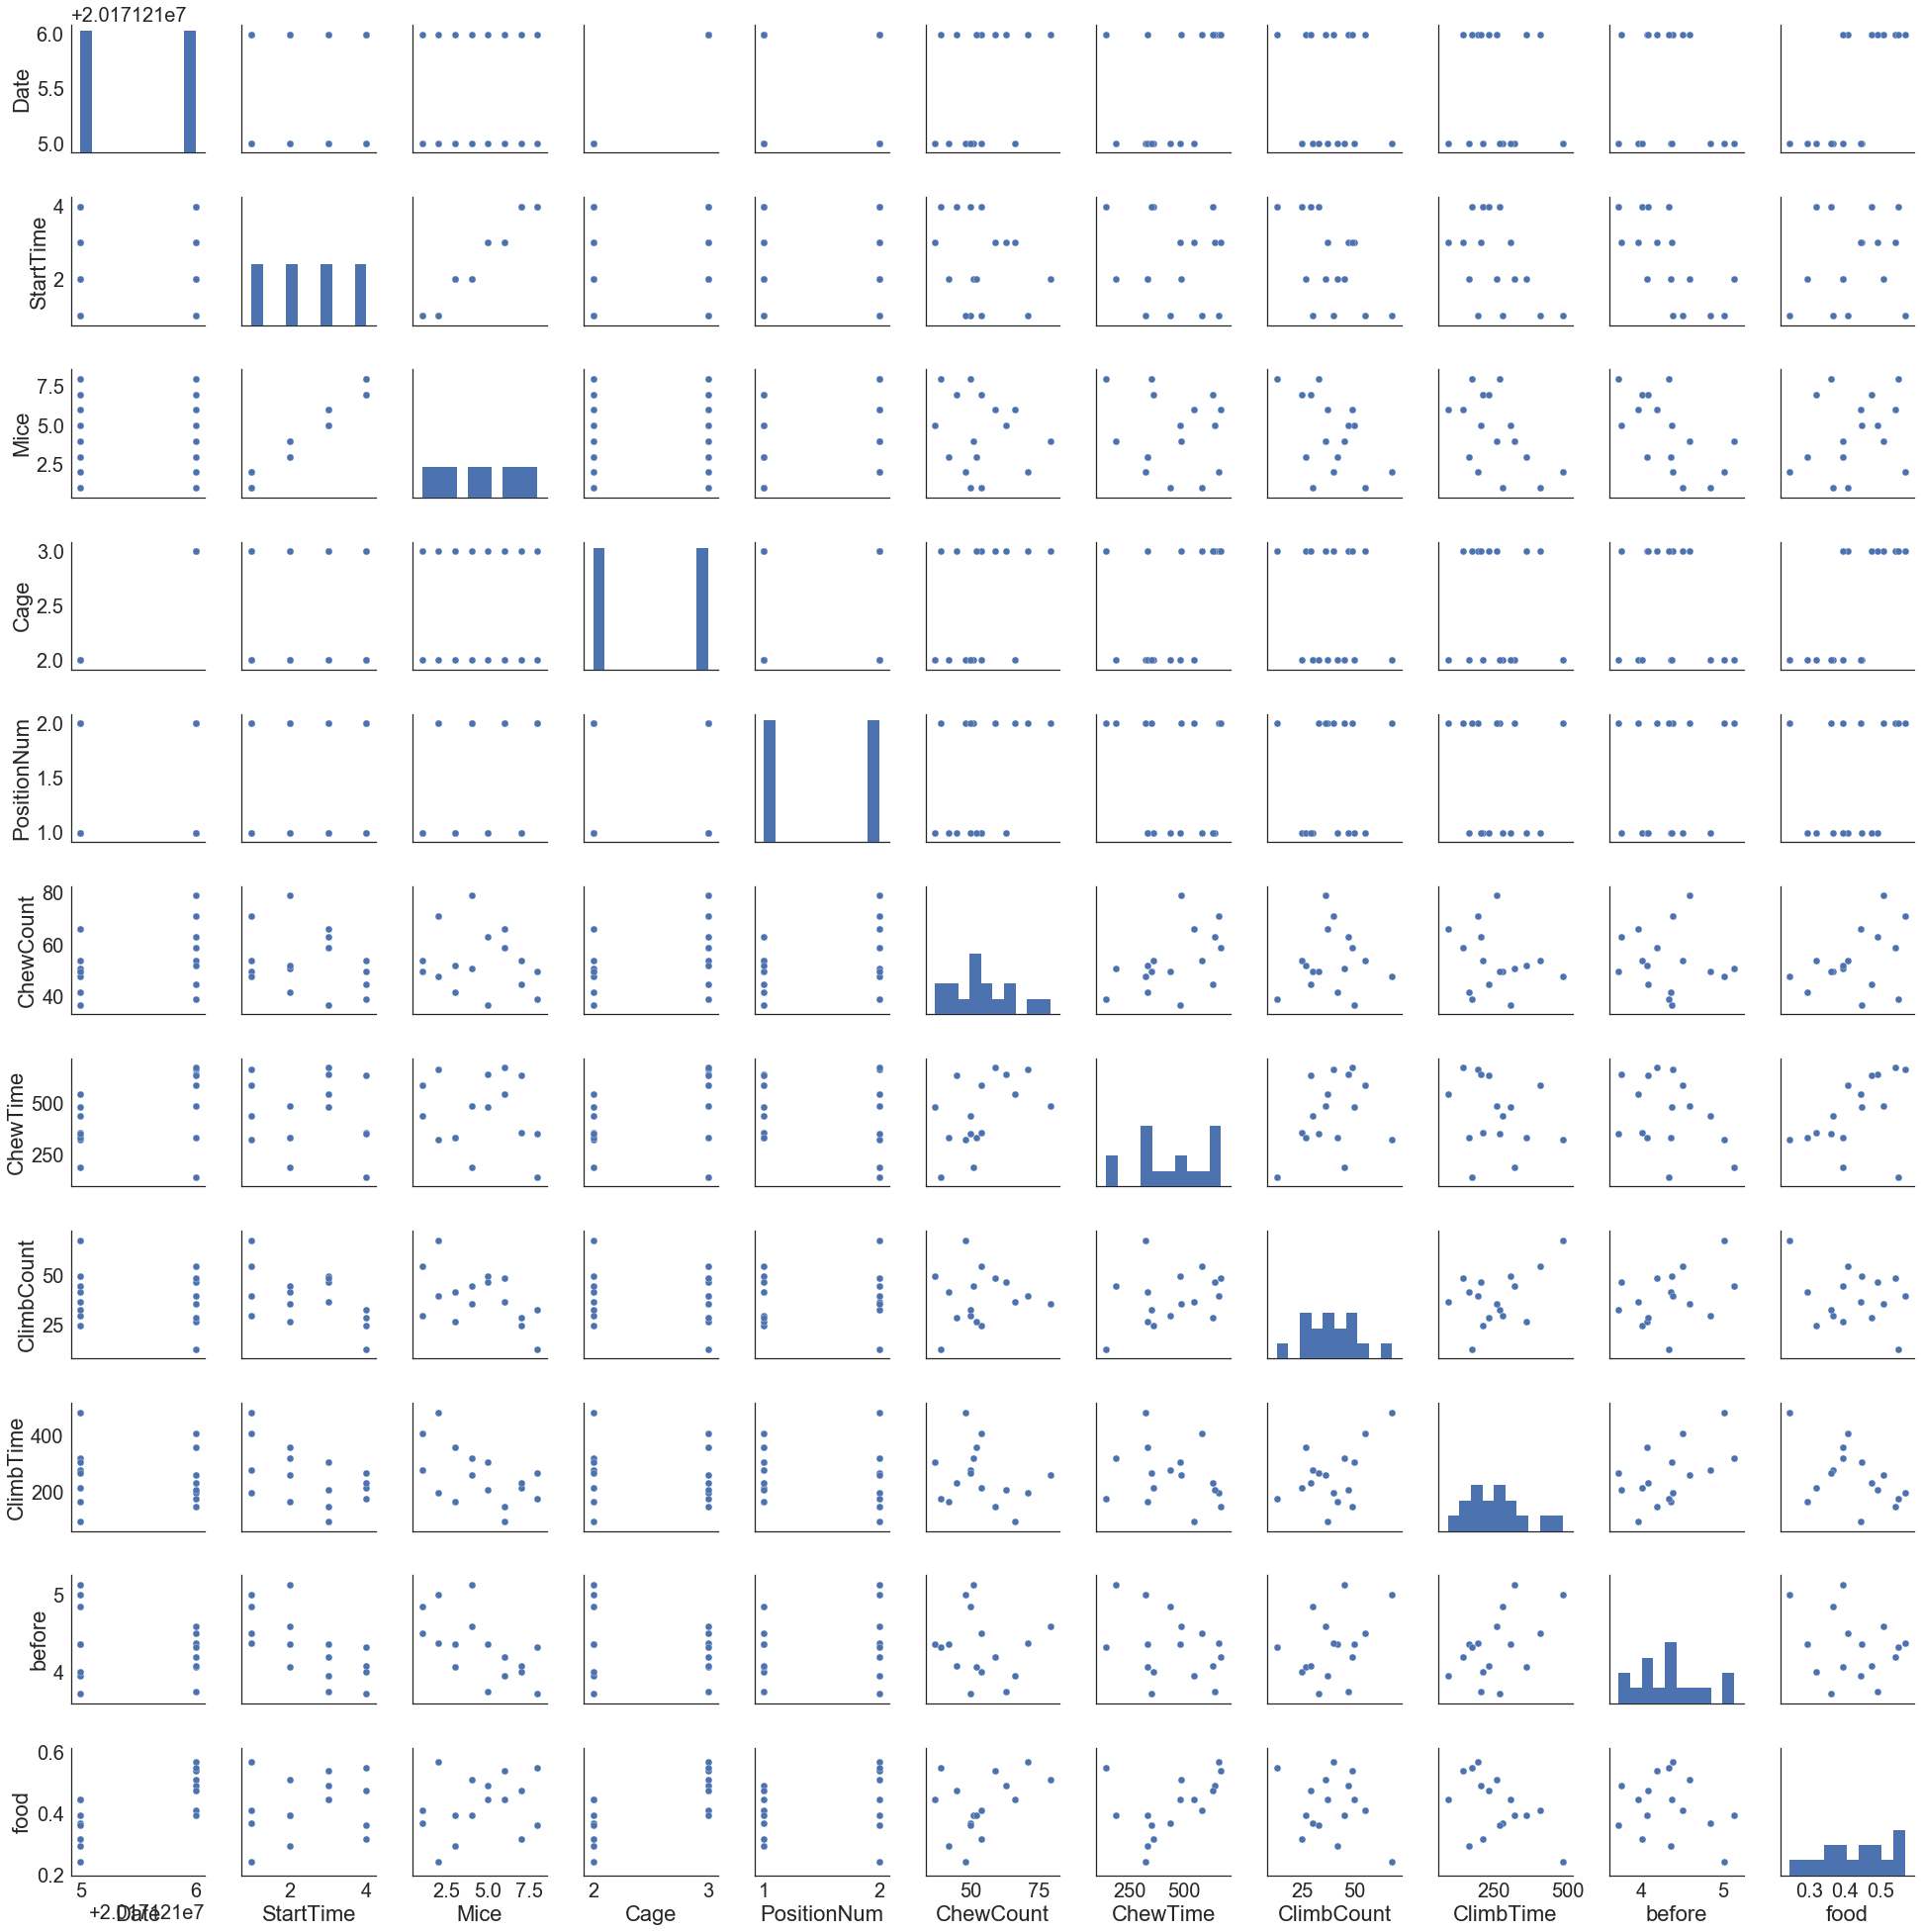

Oh


In [3]:
# 多变量作图
a = data[(data.StudyID=='TtC_NN')]
sns.set(font_scale=2)
sns.set_style('white') 
sns.pairplot(a, vars=['Date','StartTime','Mice','Cage','PositionNum','ChewCount','ChewTime','ClimbCount','ClimbTime','before','food'])
plt.show()
plt.close('all')
print('Oh')
a = data[(data.StudyID=='TtC_HH')]
sns.set(font_scale=2)
sns.set_style('white') 
sns.pairplot(a, vars=['Date','StartTime','Mice','Cage','PositionNum','ChewCount','ChewTime','ClimbCount','ClimbTime','before','food'])
plt.show()
plt.close('all')
print('Oh')

In [ ]:
# 看HH之间加上cage的变量, 不同限食组之间的区别
a = data[(data.StudyID=='TtC_HH')]
sns.set(font_scale=2)
sns.set_style('white') 
sns.pairplot(a, vars=['StartTime','PositionNum','Cage','ChewCount','ChewTime','ClimbCount','ClimbTime','before','food'])
plt.show()
plt.close('all')
print('Oh')

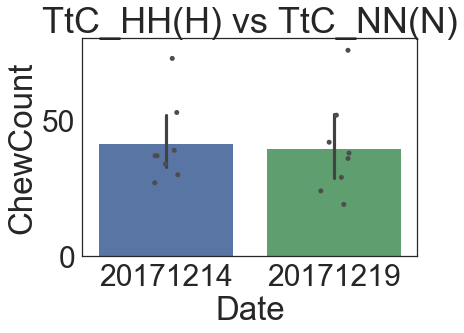

Ttest_indResult(statistic=0.45642419586950389, pvalue=0.65508559096312169)


In [6]:
# N和H的差别
a = data[(data.StudyID=='TtC_NN')]
#做图
# seeborn.set做调整
sns.set(font_scale=3)
sns.set_style('white') 
sns.stripplot(data=a,y='ChewCount',x="Date",jitter=True,color=".3")
sns.barplot(data=a,y='ChewCount',x="Date")
plt.title('TtC_HH(H) vs TtC_NN(N)')
plt.show()
plt.close('all')
# ttest
print(stats.ttest_ind(a[a.Date==20171214]['food'], a[a.Date==20171219]['food']))
